# Bootcamp Alura Data Science

## Módulo 1 - Análise de atendimentos hospitalares do SUS: valor total por Unidade Federativa

### Aula 1 - Aquisição e leitura de dados reais

Neste notebook será feita a análise de custo total de atendimentos hospitalares, separados por Estado e medidos mensalmente.

Primeiro passo a ser realizado é importar as bibliotecas Pandas e MatplotLib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

A segunda etapa é realizar a leitura dos dados. Para este caso, foi usado o dataset "A004241189_28_143_208.csv", disponível no <a href="http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def">Datasus</a>

In [2]:
dados = pd.read_csv("A004241189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")
dados.tail()
print(dados)

      Unidade da Federação  1992/Mar  1992/Abr  1993/Mai  1993/Dez  1994/Jan  \
0              11 Rondônia         -         -         -         -         -   
1                  12 Acre         -         -         -         -         -   
2              13 Amazonas         -         -         -         -         -   
3               14 Roraima         -         -         -         -         -   
4                  15 Pará         -         -         -         -         -   
5                 16 Amapá         -         -         -         -         -   
6             17 Tocantins         -         -         -         -         -   
7              21 Maranhão         -         -         -         -         -   
8                 22 Piauí         -         -         -         -         -   
9                 23 Ceará         -         -         -         -         -   
10  24 Rio Grande do Norte         -         -         -         -         -   
11              25 Paraíba         -    

Como é possível verificar acima, os números estão sendo apresentados em notação científica. Para melhorar a legibilidade dos mesmos, vamos formatar globalmente o Pandas para formatar números de ponto flutuante com precisão de duas casas decimais.

In [3]:
pd.options.display.float_format = "{:.2f}".format
plt.style.use("ggplot")

E agora nos certificamos que a formação está correta!

In [4]:
dados.mean().head()

2007/Ago     304952.77
2007/Set     788145.26
2007/Out    2440162.96
2007/Nov    5517354.05
2007/Dez   12337159.42
dtype: float64

A partir daqui vamos começar a plotar alguns gráficos. Este primeiro plotará os dados referentes a Agosto de 2008, somente informando os eixos X e Y.

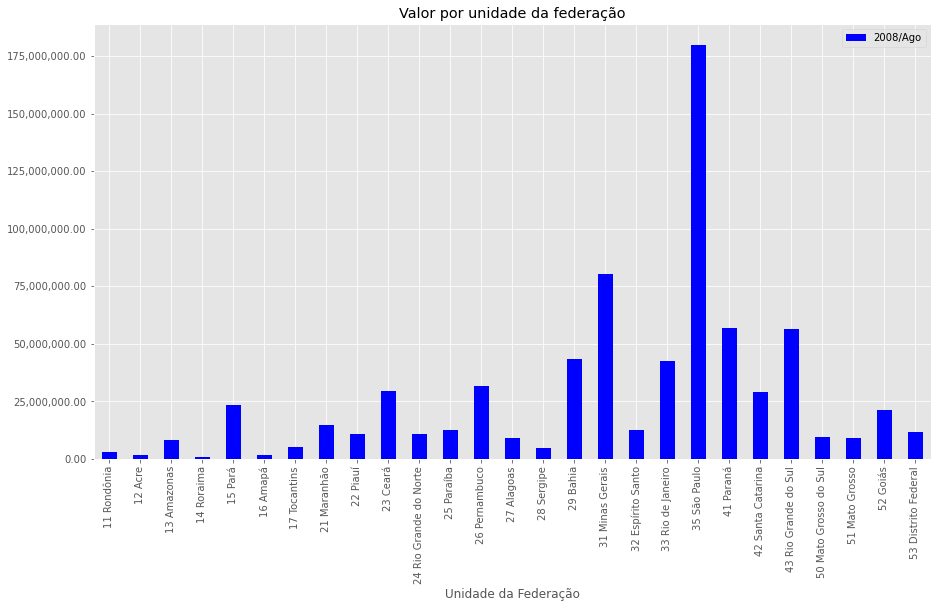

In [5]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", color="blue", figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por unidade da federação")
plt.show()

É possível melhorar a exibição deste gráfico, começando por ordenar os valores e apresenta-los na horizontal, exibindo valores por milhão de reais.

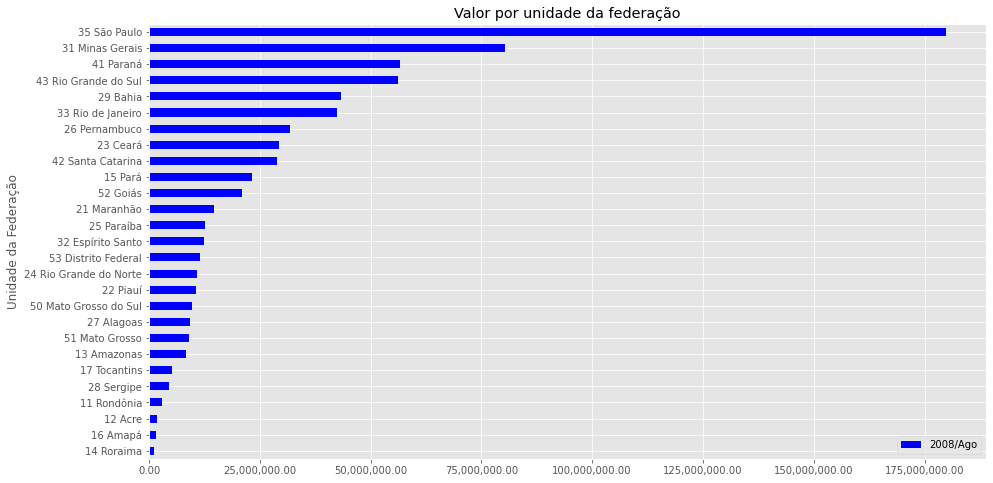

In [6]:
dados = dados.sort_values(by="2008/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="barh", color="blue",figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por unidade da federação")
plt.show()

#### Desafio 1 - Escolher um título mais descritivo

Para cumprir o primeiro desafio, segue o mesmo gráfico, porém com um título mais descritivo e o eixo de valores divido por um milhão, para facilitar a legibilidade.

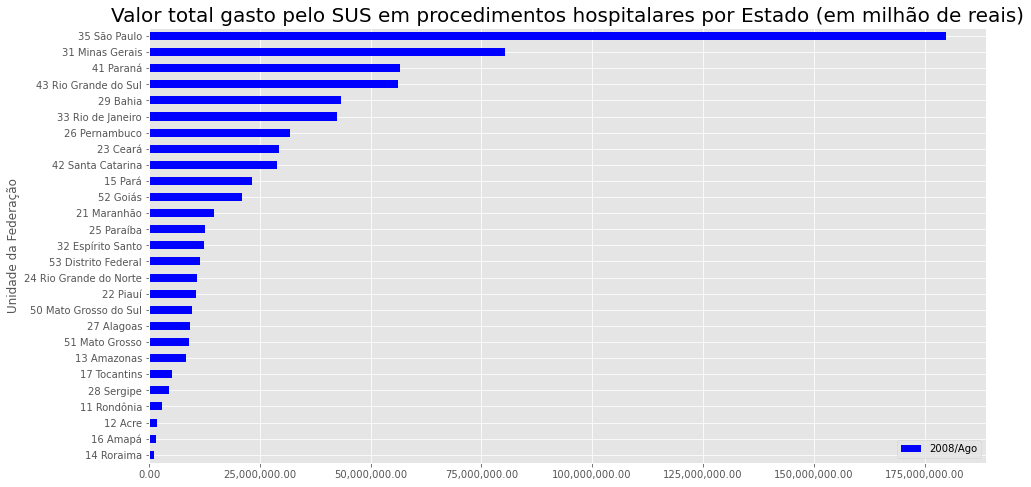

In [7]:
dados = dados.sort_values(by="2008/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="barh", color="blue", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label = "Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

#### Desafio 2 - Realizar a mesma annálise, porém para o mês mais recente

Para cumprir o segundo desafio, precisaremos saber qual o mês mais recente disponível no dataset. Como os meses estão distribuídos em colunas, podemos realizar uma consulta no dataset para retornar, por exemplo, as últimas três colunas disponíveis.

In [8]:
dados[dados.columns[-3:]].head()
#dados.iloc[:, list(range(1)) + [-2]]

,2020/Jul,2020/Ago,Total
19,282709570.31,140414944.95,38929353900.57
16,120467187.34,57473699.06,19160106499.88
20,80320852.69,41542401.16,13786964617.27
22,78929703.81,28349257.38,11958647088.33
15,58898100.40,26023558.53,9193802684.16


Dado o resultado acima, verificamos que o mês mais recente disponível para análise é Agosto de 2020. Então vamos replicar o gráfico feito anteriormente, atualizando o mês e ano.
Existe uma linha na coluna referente ao mês de agosto que contém um hífen no lugar de um valor numérico. Para evitar erros durante a execução do código, vamos substituir esta ocorrência por um zero e, em seguinda, plotar o gráfico.

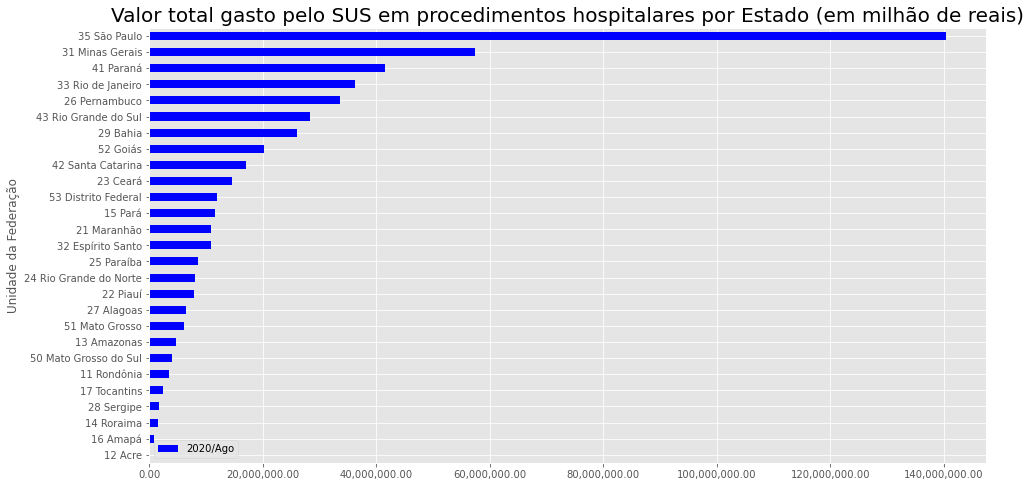

In [9]:
dados["2020/Ago"] = dados["2020/Ago"].str.replace(r'-', '0').astype(float)
dados = dados.sort_values(by="2020/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="barh", color="blue", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label = "Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

### Aula 2 - Primeiras visualizações de dados

Neste ponto, vamos pegar os dados referentes aos meses de agosto e setembro de 2008, apenas para fins de verificação.

In [10]:
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
19,179898070.22,180082203.71
16,80374117.08,82400146.79
20,56699001.13,58091985.79
18,42487939.51,43066461.47
12,31705296.79,30703879.20


A próxima etapa é pesquisar quais são as colunas com valores disponíveis para consulta. Uma das formas é calcular a média do dataset.

In [11]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
2020/Ago     19144523.30
Total      5993724452.01
Length: 158, dtype: float64

Agora sabemos todas as colunas com valores usaveis. Então vamos colocar estas colunas em um atributo, usando o índice.

In [12]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


E agora vamos requisitar ao dataframe somente as colunas que sabemos ter valores disponíveis para consulta.

In [13]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
19,35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,...,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95,38929353900.57
16,31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,...,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06,19160106499.88
20,41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,...,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16,13786964617.27
18,33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,...,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,36264322.65,9696362872.68
12,26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51219113.60,26222079.10,30716361.81,30589332.79,...,64856891.24,69630712.14,62552189.96,59628674.07,53843729.23,65424719.40,68145110.59,62325444.34,33544876.14,8046954289.39


Neste ponto, iremos configurar o dataset para usar os Estados como índice.

In [14]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,...,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95,38929353900.57
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06,19160106499.88
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16,13786964617.27
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,...,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,36264322.65,9696362872.68
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51219113.60,26222079.10,30716361.81,30589332.79,31409553.23,...,64856891.24,69630712.14,62552189.96,59628674.07,53843729.23,65424719.40,68145110.59,62325444.34,33544876.14,8046954289.39


Com isso, agora podemos fazer consultas baseados no índice completo. Por exemplo, consultar dados de Agosto de 2019!

In [15]:
usaveis["2019/Ago"].head()

Unidade da Federação
35 São Paulo        302367276.77
31 Minas Gerais     161707825.05
41 Paraná           127174095.05
33 Rio de Janeiro    83311603.59
26 Pernambuco        71735626.96
Name: 2019/Ago, dtype: float64

Ou mesmo consultar dados baseados no Estado de Santa Catarina, por exemplo.

In [16]:
usaveis.loc["42 Santa Catarina"].head()

2007/Ago     693955.05
2007/Set    1092964.12
2007/Out    3562300.82
2007/Nov    7578502.38
2007/Dez   14772555.10
Name: 42 Santa Catarina, dtype: float64

Com o trabalho realizado até agora, já podemos gerar alguns gráficos. Vamos tentar gerar um bem simples.

<AxesSubplot:xlabel='Unidade da Federação'>

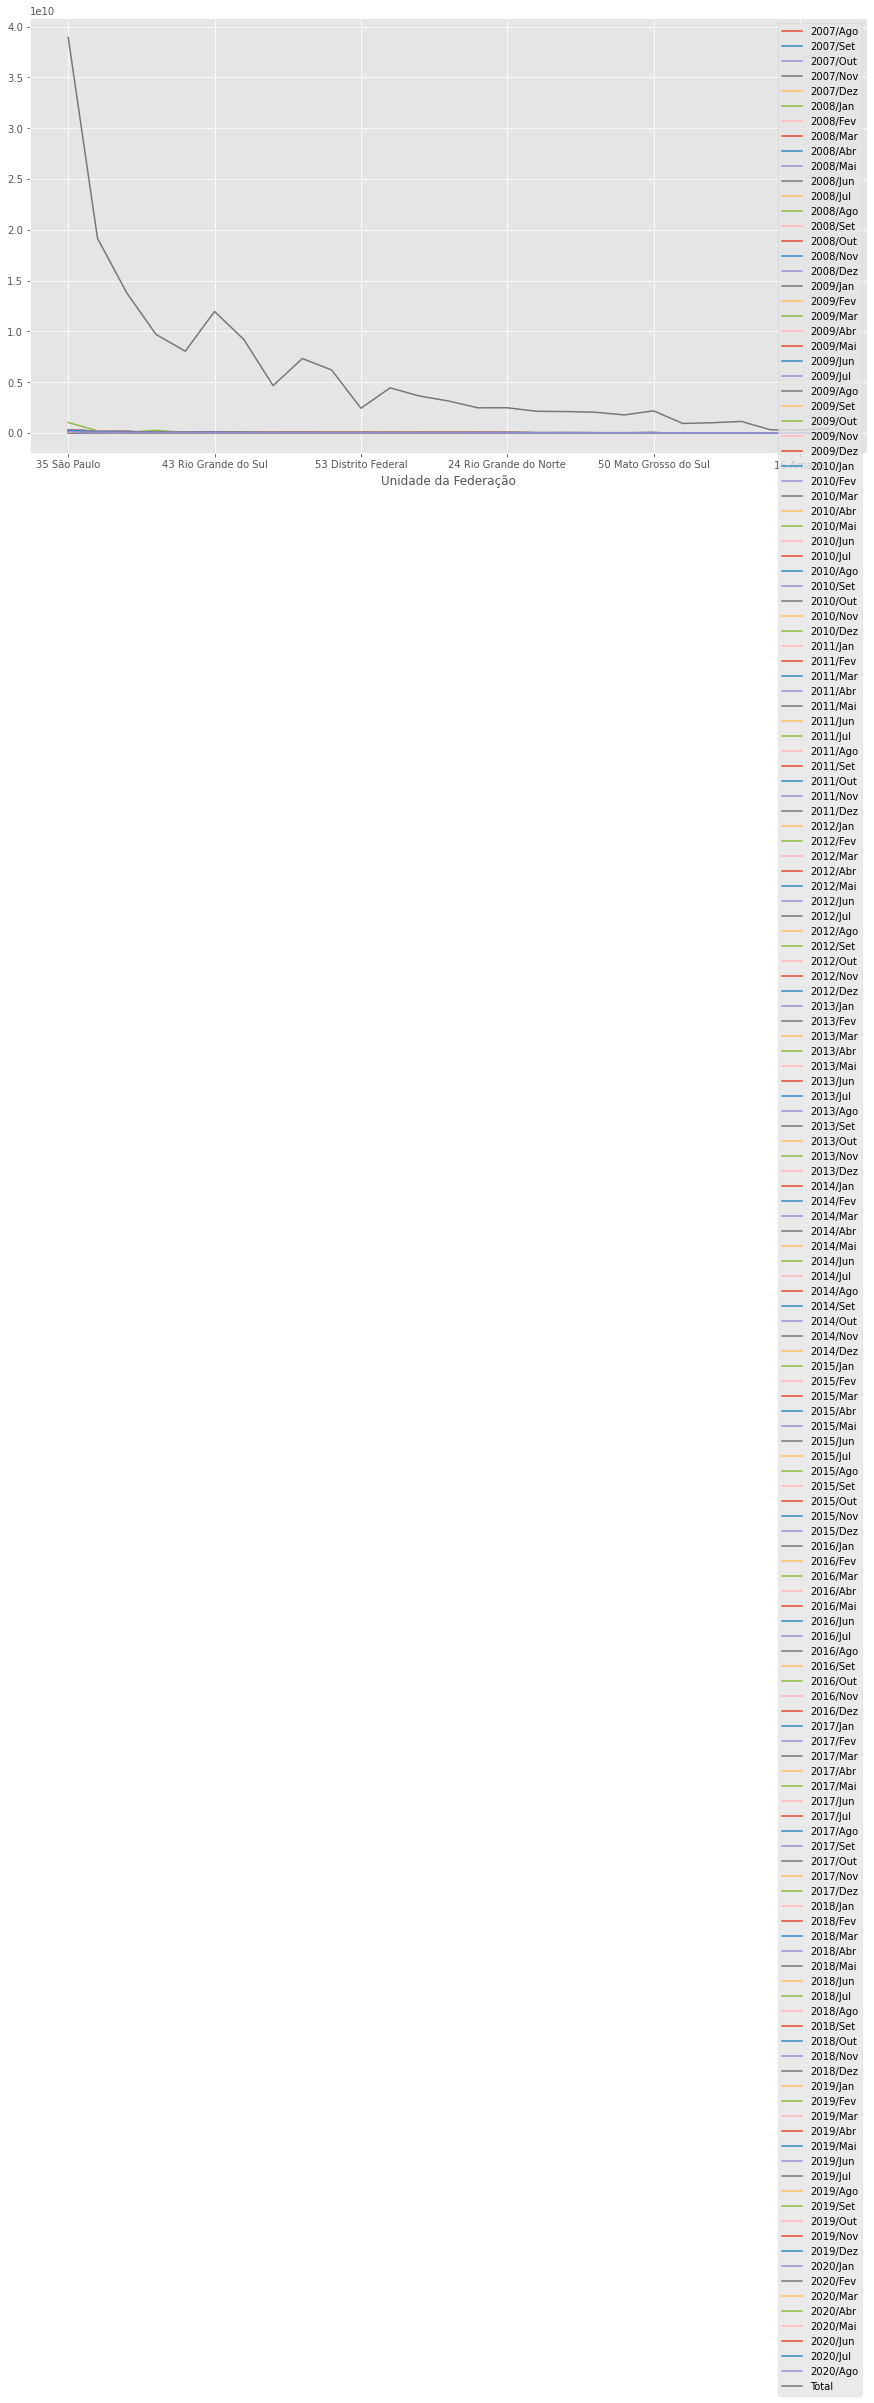

In [17]:
usaveis.plot(figsize=(15,8))

Perceba que o gráfico não ficou visualmente interessante! =/ Isso acontece porque ele está interpretando os Estados como linhas e os meses a anos como colunas. Vamos ver novamente a disposição dos dados no dataset.

In [18]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,...,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95,38929353900.57
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06,19160106499.88
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16,13786964617.27
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,...,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,36264322.65,9696362872.68
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51219113.60,26222079.10,30716361.81,30589332.79,31409553.23,...,64856891.24,69630712.14,62552189.96,59628674.07,53843729.23,65424719.40,68145110.59,62325444.34,33544876.14,8046954289.39


Note que os Estados estão nas linhas e os meses e anos nas colunas. O ideal seria transpor estes dados, ou seja, os Estados passarem a ser colunas e os meses e anos passarem a serem linhas. E isso é possível, invocando o "T" no dataset!

In [19]:
usaveis.T.head()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,33 Rio de Janeiro,26 Pernambuco,43 Rio Grande do Sul,29 Bahia,52 Goiás,42 Santa Catarina,23 Ceará,...,27 Alagoas,51 Mato Grosso,13 Amazonas,50 Mato Grosso do Sul,11 Rondônia,17 Tocantins,28 Sergipe,14 Roraima,16 Amapá,12 Acre
2007/Ago,1665349.90,971394.37,554800.22,469469.34,400640.85,1049252.33,135146.36,179395.82,693955.05,357904.65,...,104243.75,63562.50,35752.72,199556.12,4209.37,4113.76,27453.63,4785.91,33672.74,10470.07
2007/Set,4434168.64,2861781.50,1431708.01,921646.57,1088340.42,3182913.14,448349.75,418053.58,1092964.12,572356.18,...,174024.90,232444.62,45570.64,573675.41,16397.03,76633.06,78565.19,11858.63,104822.98,14001.71
2007/Out,14577395.84,10018011.35,4630402.44,2994664.57,2973553.48,8571312.11,1382038.11,1198730.25,3562300.82,1865065.71,...,595544.54,927219.59,416012.30,1069816.66,133645.19,343702.61,122952.94,43852.67,118378.28,86200.85
2007/Nov,35032259.98,21730281.63,11120030.79,7250528.08,6699828.82,16592432.80,3348779.62,2712117.54,7578502.38,5131814.39,...,1125396.73,1740439.60,2020381.79,1995899.52,346912.84,1068685.94,775705.52,369328.51,226661.18,301323.68
2007/Dez,76668547.41,43429517.54,28790722.87,13627123.27,16919031.39,30134255.70,11948984.56,9293914.78,14772555.10,10798042.86,...,2564966.65,5394225.43,5949408.99,4277979.14,711758.31,3022200.87,2765495.63,470676.43,844019.90,769612.36


Agora está do jeito que queremos! :) Vamos tentar plotar um gráfico...

<AxesSubplot:>

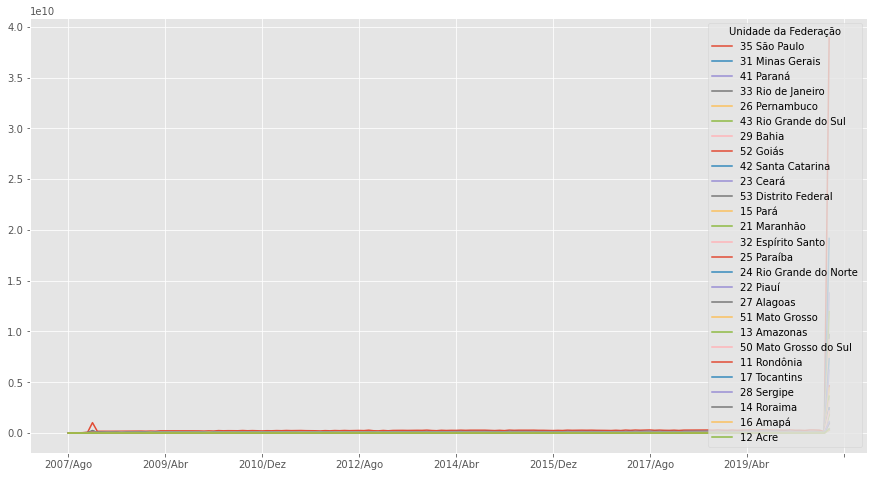

In [20]:
usaveis.T.plot(figsize=(15,8))

Melhorou um pouco. Mas ainda há algo estranho... Todo mundo está com valor próximo do zero. No final do gráfico a direita os valores estão absurdamente altos! O que está provocando isso? Uma dica é olhar para o final do nosso dataset, usando o comando "tail".

In [21]:
usaveis.T.tail()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,33 Rio de Janeiro,26 Pernambuco,43 Rio Grande do Sul,29 Bahia,52 Goiás,42 Santa Catarina,23 Ceará,...,27 Alagoas,51 Mato Grosso,13 Amazonas,50 Mato Grosso do Sul,11 Rondônia,17 Tocantins,28 Sergipe,14 Roraima,16 Amapá,12 Acre
2020/Mai,302857660.98,136867275.75,106103737.62,86281033.16,65424719.40,86076113.42,61756775.71,31870107.62,56843604.33,54200339.48,...,15254204.31,13981483.29,19441150.53,16703851.10,8581195.13,6732370.56,8450209.57,2910776.44,2701014.87,2383895.48
2020/Jun,299060851.62,135977571.87,92901461.36,77604925.21,68145110.59,89019478.82,65159300.63,34437633.20,56503747.99,42146555.81,...,14278872.07,14585009.42,17509334.66,15838659.34,9193593.76,5018138.13,6705923.03,3216466.51,2699492.23,2199920.70
2020/Jul,282709570.31,120467187.34,80320852.69,71540227.33,62325444.34,78929703.81,58898100.40,33499284.38,51764534.76,30809221.22,...,13087850.40,13083151.70,13358514.02,12508717.35,7407388.24,4489665.87,3312766.32,2739498.41,2155083.37,1163813.08
2020/Ago,140414944.95,57473699.06,41542401.16,36264322.65,33544876.14,28349257.38,26023558.53,20242641.73,16991236.43,14559529.59,...,6487947.82,6174224.99,4726485.73,4059220.22,3556381.57,2453362.74,1742127.72,1524478.04,834187.31,0.00
Total,38929353900.57,19160106499.88,13786964617.27,9696362872.68,8046954289.39,11958647088.33,9193802684.16,4657348958.66,7324100054.96,6197357245.98,...,2104405303.11,2036923784.59,1771654871.23,2172157981.36,929129659.72,999998621.85,1130337049.71,305010883.18,291637984.75,420668039.63


Repare a presença da última linha! Ela contém o total de gastos para cada mês e anos, prejudicando a legibilidade e análise do nosso dataset e gráficos. Precisamos de alguma forma eliminar esta linha de total! Podemos retirar com um "drop", indicando ao método que queremos que ele busque o valor na linha ("axis=1").

In [22]:
usaveis = usaveis.drop("Total", axis=1)
usaveis.T.tail()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,33 Rio de Janeiro,26 Pernambuco,43 Rio Grande do Sul,29 Bahia,52 Goiás,42 Santa Catarina,23 Ceará,...,27 Alagoas,51 Mato Grosso,13 Amazonas,50 Mato Grosso do Sul,11 Rondônia,17 Tocantins,28 Sergipe,14 Roraima,16 Amapá,12 Acre
2020/Abr,251696362.66,126330649.86,96727112.19,68160773.35,53843729.23,76294596.96,59109689.20,27499307.93,51179993.45,43468816.62,...,14241361.44,11943713.53,16330913.81,15652772.51,7423678.64,6204453.42,8395906.57,2304961.42,1774558.12,2472063.08
2020/Mai,302857660.98,136867275.75,106103737.62,86281033.16,65424719.40,86076113.42,61756775.71,31870107.62,56843604.33,54200339.48,...,15254204.31,13981483.29,19441150.53,16703851.10,8581195.13,6732370.56,8450209.57,2910776.44,2701014.87,2383895.48
2020/Jun,299060851.62,135977571.87,92901461.36,77604925.21,68145110.59,89019478.82,65159300.63,34437633.20,56503747.99,42146555.81,...,14278872.07,14585009.42,17509334.66,15838659.34,9193593.76,5018138.13,6705923.03,3216466.51,2699492.23,2199920.70
2020/Jul,282709570.31,120467187.34,80320852.69,71540227.33,62325444.34,78929703.81,58898100.40,33499284.38,51764534.76,30809221.22,...,13087850.40,13083151.70,13358514.02,12508717.35,7407388.24,4489665.87,3312766.32,2739498.41,2155083.37,1163813.08
2020/Ago,140414944.95,57473699.06,41542401.16,36264322.65,33544876.14,28349257.38,26023558.53,20242641.73,16991236.43,14559529.59,...,6487947.82,6174224.99,4726485.73,4059220.22,3556381.57,2453362.74,1742127.72,1524478.04,834187.31,0.00


Perceba que a linha de total não aparece mais! Agora sim podemos tentar plotar o gráfico novamente. :)

<AxesSubplot:>

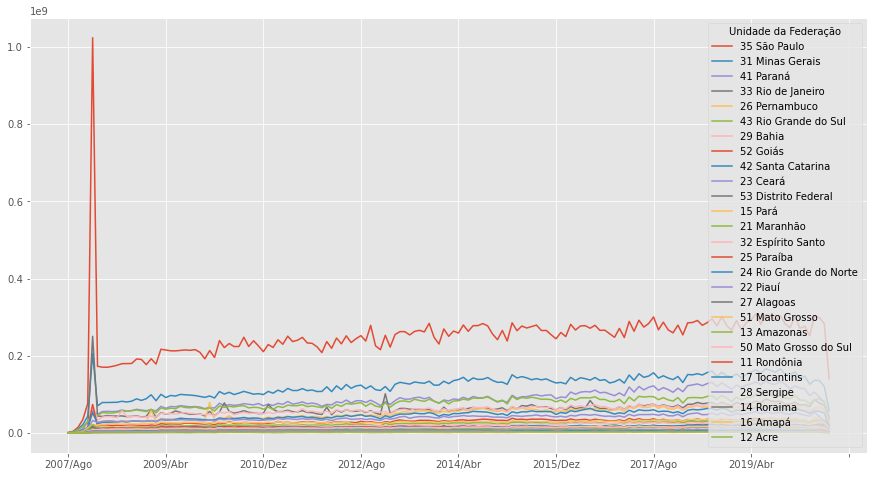

In [23]:
usaveis.T.plot(figsize=(15,8))

Agora sim está mais coerente!

#### Desafio 1 - Reposicionar a legenda do gráfico

O primeiro desafio proposto é colocar a legenda do gráfico em uma posição mais adequada. Vamos ao desafio!

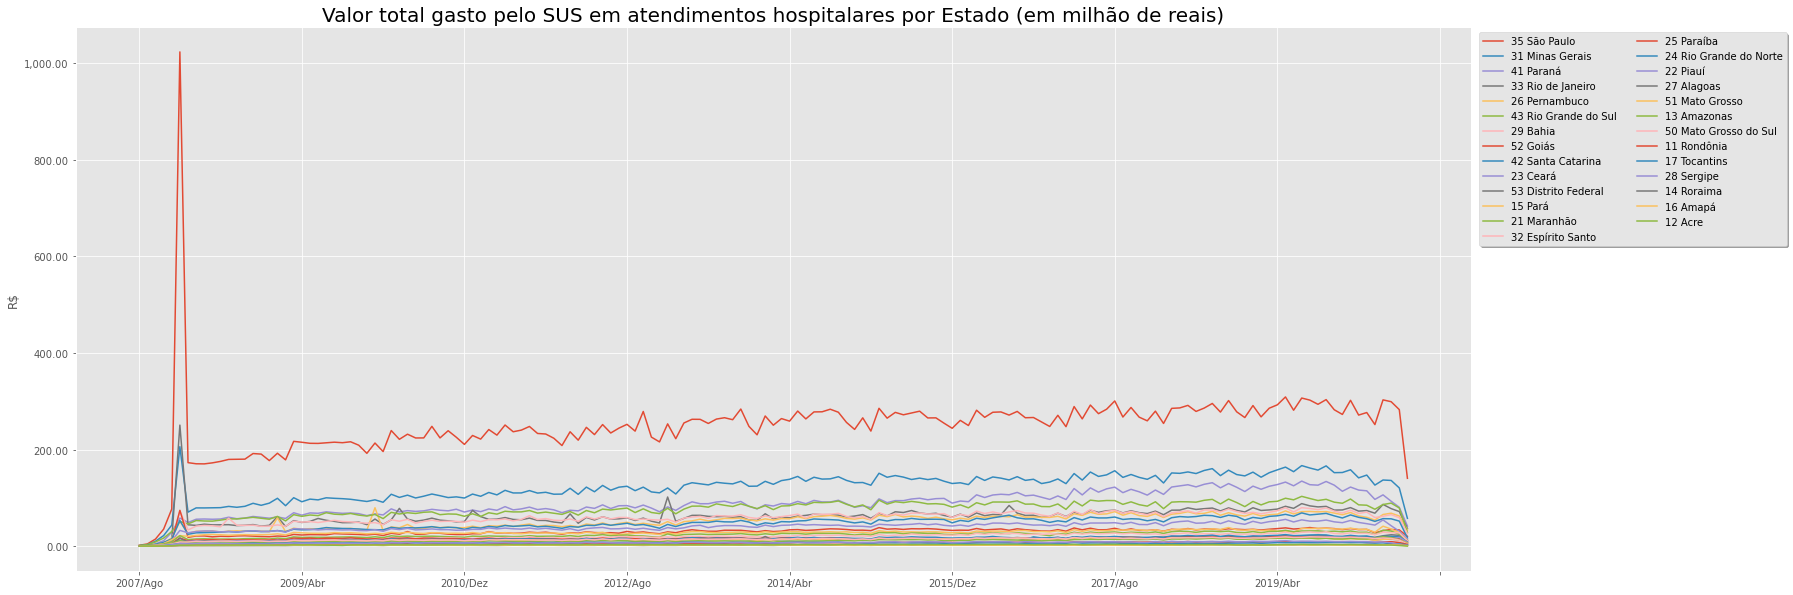

In [24]:
usaveis_plot = usaveis.div(1000000)
ax = usaveis_plot.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

#### Desafio 2 - Plotar o gráfico de linha com apenas cinco estados de sua preferência

E se nós quiséssemos plotar o gráfico de apenas 5 Estados quaisquer? Vamos fazer isso agora. Aleatoriamente, vamos escolher os Estados de São Paulo, Minas Gerais, Rio de Janeiro, Santa Catarina e Sergipe.

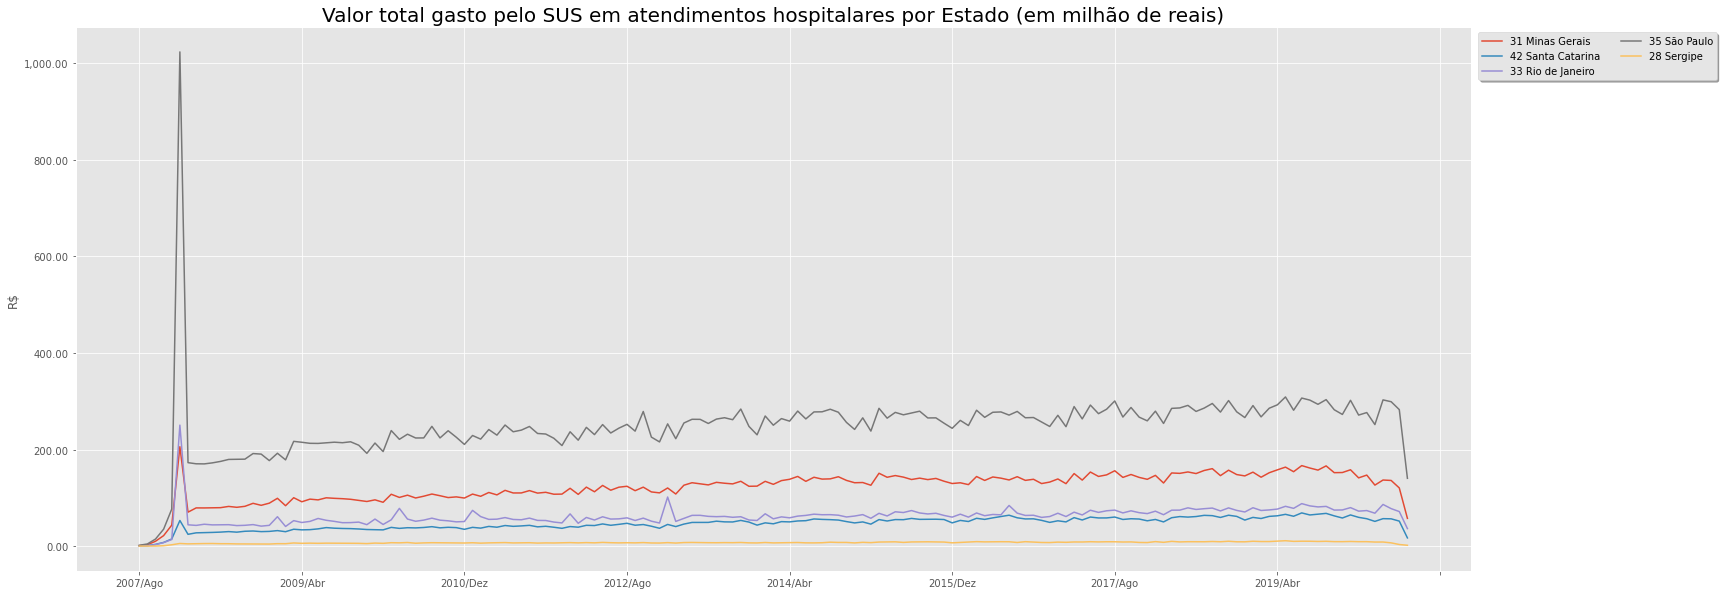

In [25]:
ax = usaveis_plot.T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.18, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

### Aula 3 - Manipulação de dados

Vendo o gráfico da aula anterior - que contém todos os estados, podemos perceber que tem algumas coisas esquisitas com ele.

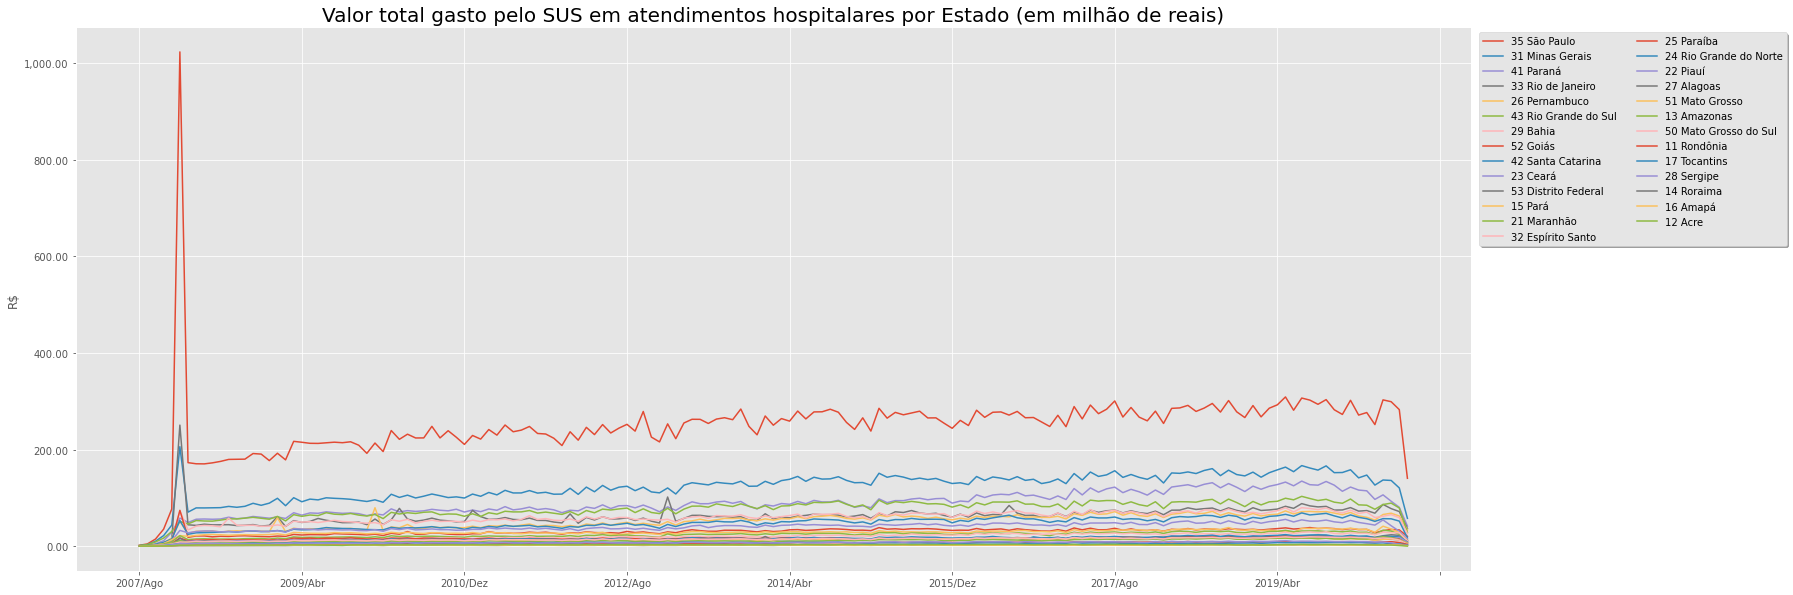

In [26]:
ax = usaveis_plot.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

Existe um pico de valores no começo do gráfico que, a princípio, não sabemos o motivo. Além disso, não há clareza quanto às informações das linhas. Esta linha em vermelho em destaque se refere aos gastos do Estado de São Paulo ou Paraíba? Não tem como saber, pois o ggplot alocou a mesma cor para ambos os Estados! o_O

#### Desafio 1 - Mudar palete de cores

Então o primeiro desafio que se faz necessário é mudar a palete de cores! Por padrão, é setada uma palete com seis cores. Como estamos plotando informações dos Estados do Brasil, usaremos uma palete com 27 cores.

O primeiro desafio pede para escolher uma palete de cores mais adequada do matplotlib.

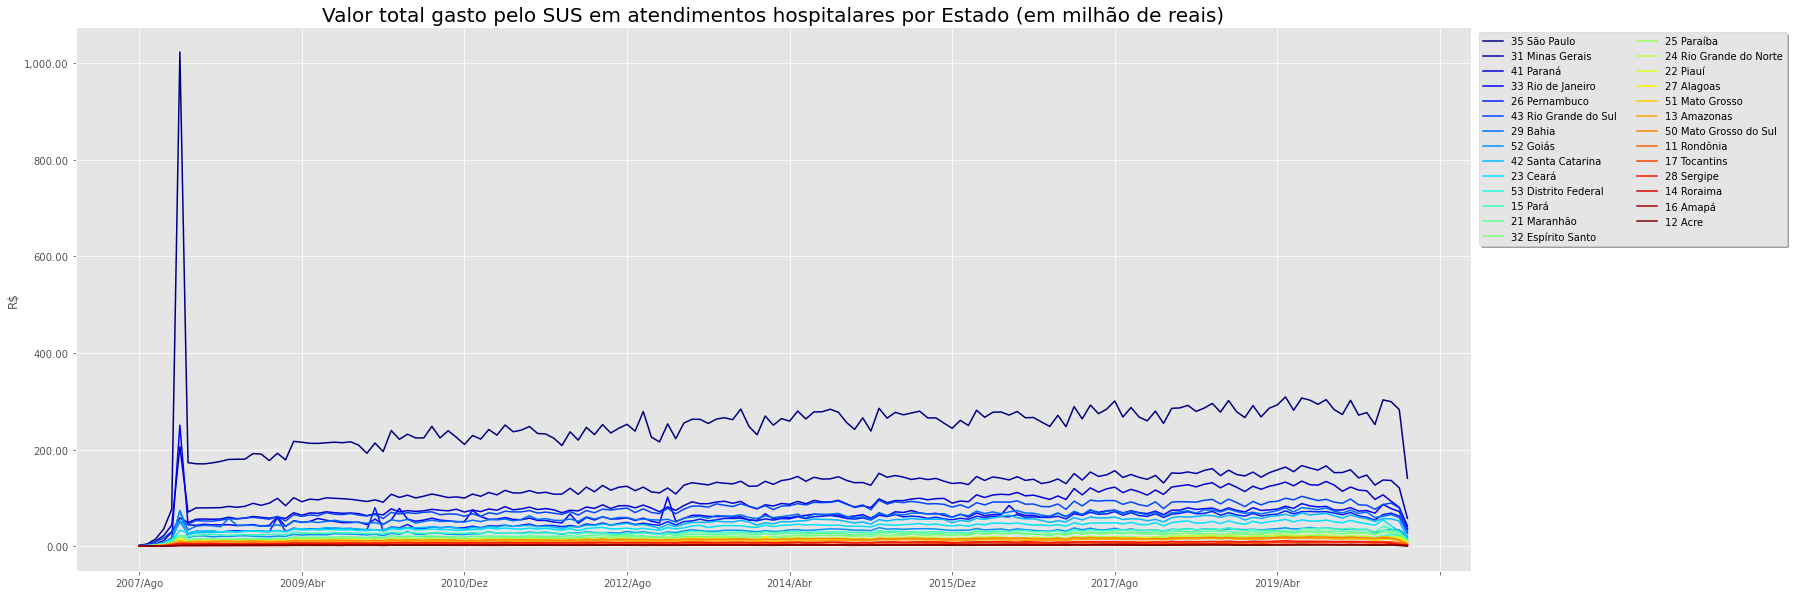

In [27]:
colors = plt.cm.jet(np.linspace(0,1,27))
ax = usaveis_plot.T.plot(figsize=(25,10), color=colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

A parte de reposicionar a legenda já foi feita em aulas anteriores.
Notamos que agora temos cores diferentes. Mas ainda está ruim de entender o que está no gráfico! Pois ainda temos muitos dados. Grande parte deles consolidados na parte de baixo. Impossível de entender o que está acontecendo! A informação não está legível! =/ Isso nos leva ao segundo desafio...

#### Desafio 2 - Pesquisar apenas cinco Estados

Nesta parte iremos reduzir a amostra para apenas 5 Estados. Existem algumas formas de fazer isso. Aqui serão mostradas três formas: cinco Estados aleatórios, cinco que mais gastaram e cinco informados explicitamente.

O primeiro caso que será mostrado aqui é o mais simples, onde informaremos explicitamente cinco Estados para serem exibidos no gráfico.

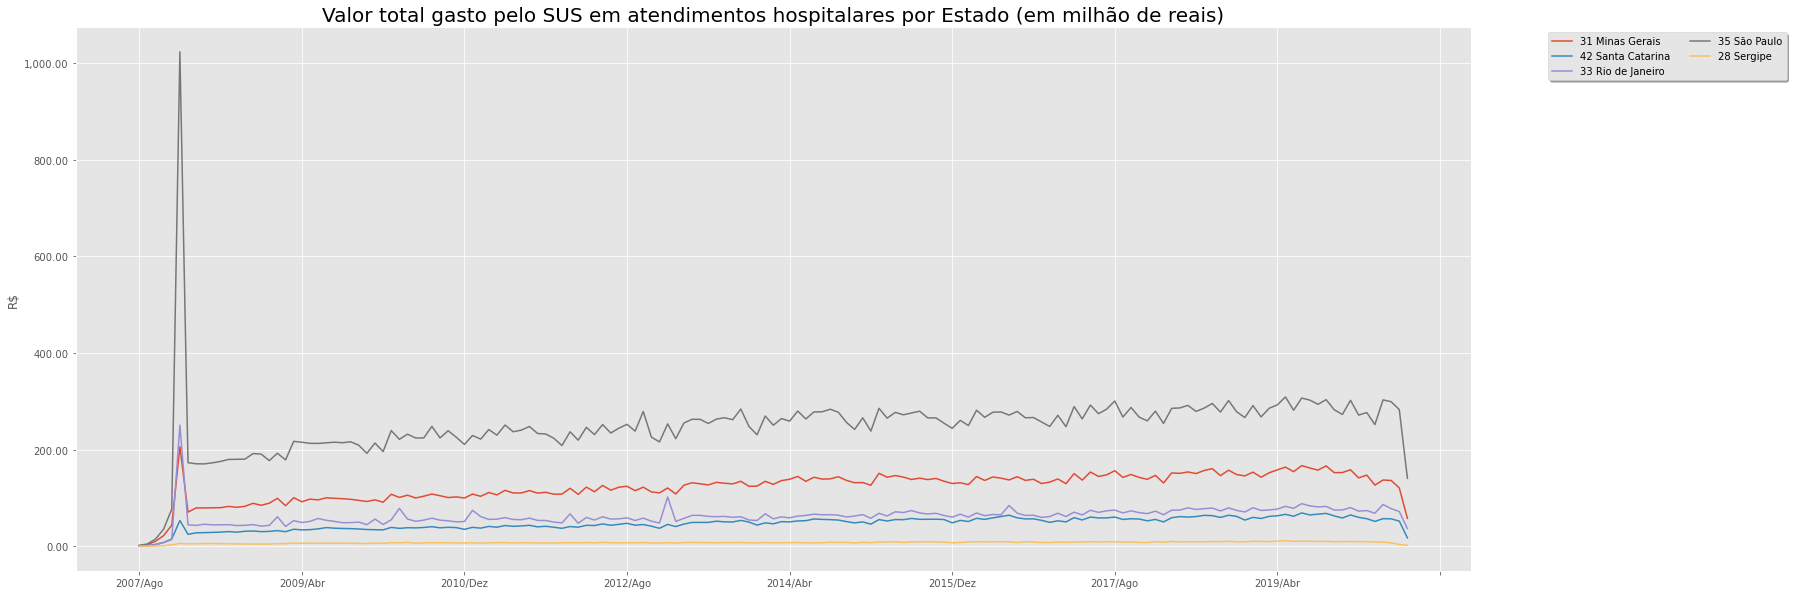

In [28]:
ax = usaveis_plot.T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

Uma outra forma de obter os cinco Estados é deixar o dataframe escolher aleatoriamente para nós!

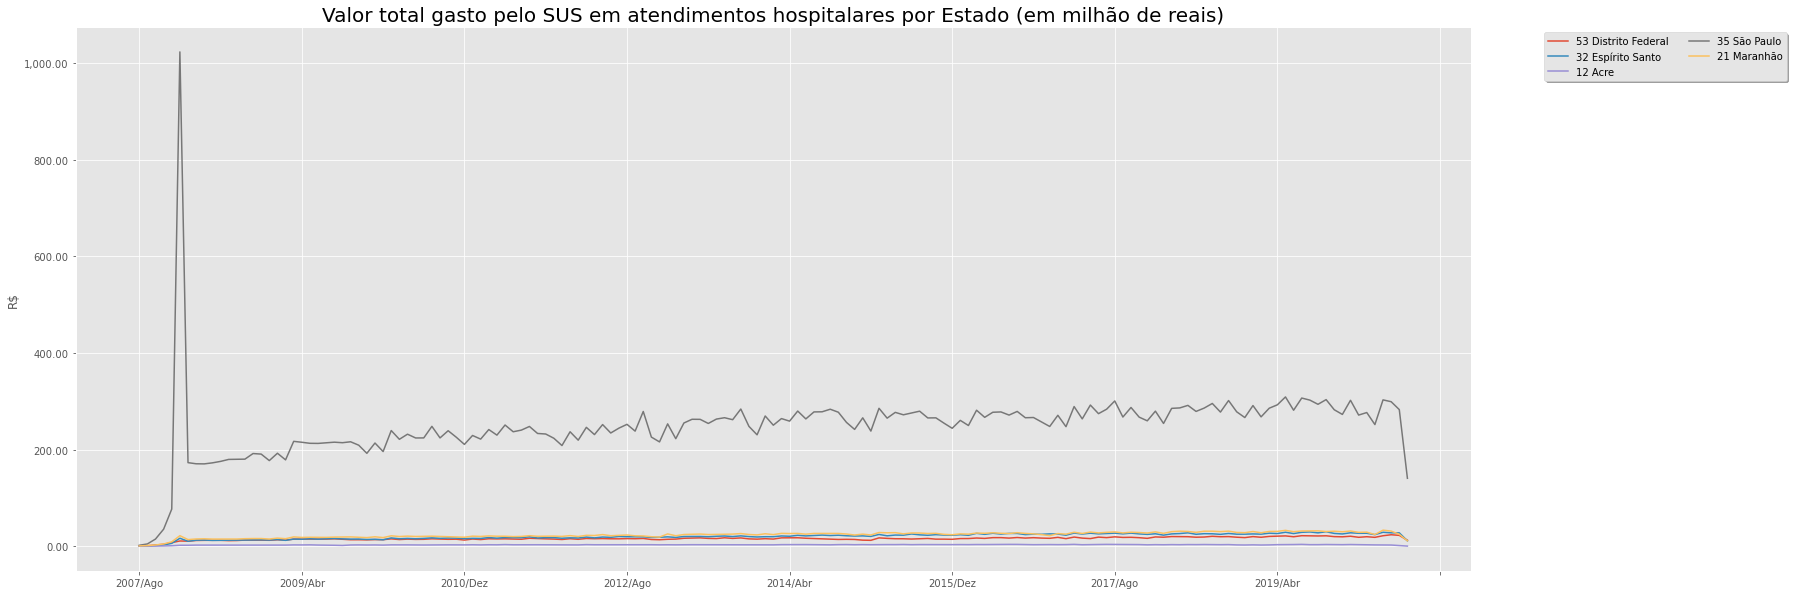

In [29]:
ax = usaveis_plot.sample(5).T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

Se quisermos ter mais controle sobre a aleatoriedade aplicada, podemos definir um seed para que a biblioteca numpy use ao fornecer valores aleatórios.

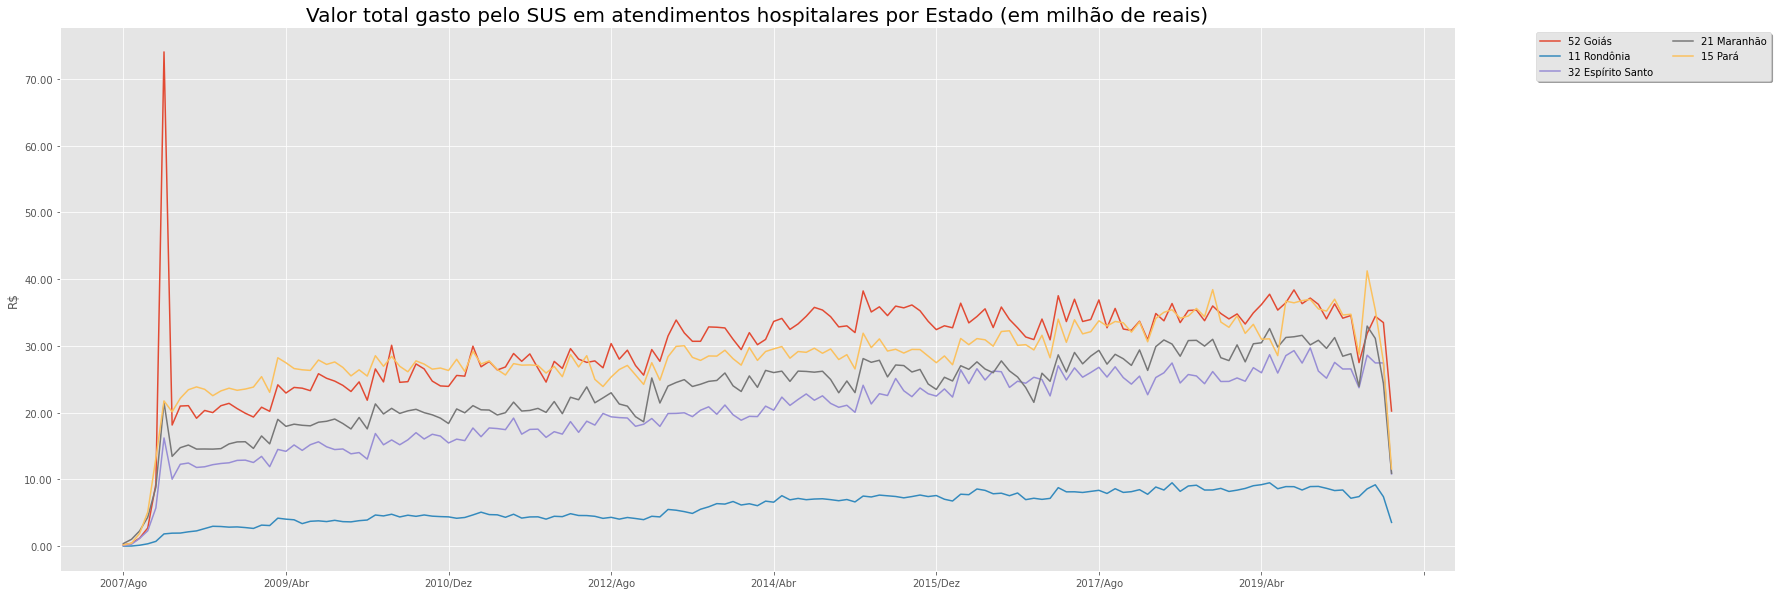

In [30]:
np.random.seed(505152)
ax = usaveis_plot.sample(5).T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

Se rodarmos o gráfico novamente, iremos ver os mesmos Estados!

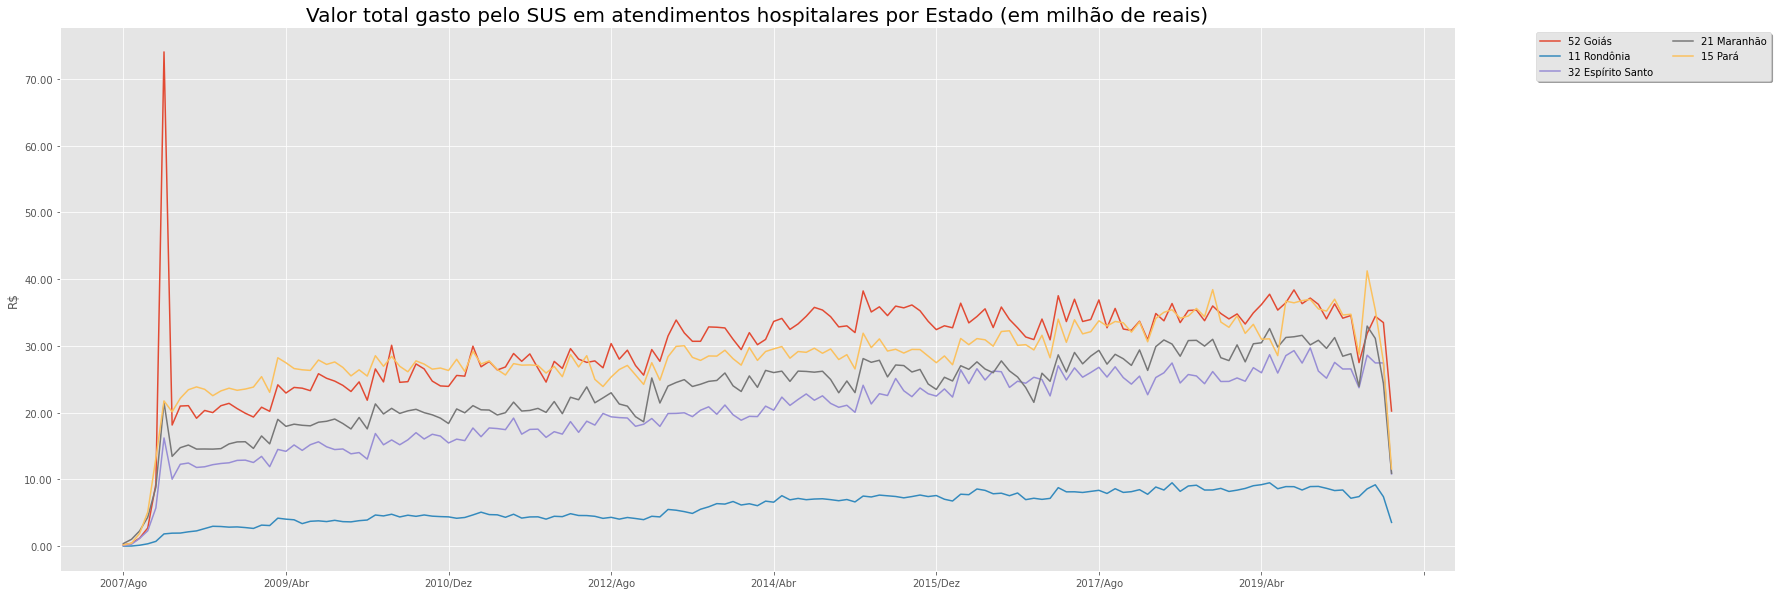

In [31]:
np.random.seed(505152)
ax = usaveis_plot.sample(5).T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

E, por fim, mostraremos os cinco Estados que mais gastaram. Para isso, primeiro vamos adicionar uma coluna contendo os gastos totais no dataframe já existente. Em seguida, vamos ordenar os resultados de forma decrescente.

In [32]:
usaveis_plot["Total"] = usaveis_plot.sum(axis=1)
usaveis_plot = usaveis_plot.sort_values("Total", ascending=False)
usaveis_plot

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.67,4.43,14.58,35.03,76.67,1023.56,172.83,170.48,170.28,172.40,...,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71,140.41,38919.48
31 Minas Gerais,0.97,2.86,10.02,21.73,43.43,205.91,70.30,79.12,79.05,79.27,...,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47,57.47,19159.57
41 Paraná,0.55,1.43,4.63,11.12,28.79,58.08,48.86,55.61,56.12,55.57,...,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32,41.54,13786.79
43 Rio Grande do Sul,1.05,3.18,8.57,16.59,30.13,51.06,45.90,52.93,51.97,51.68,...,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93,28.35,11958.53
33 Rio de Janeiro,0.47,0.92,2.99,7.25,13.63,250.56,44.12,42.89,45.30,43.95,...,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54,36.26,9696.20
29 Bahia,0.14,0.45,1.38,3.35,11.95,73.34,33.41,41.30,42.83,42.07,...,68.58,74.37,67.70,70.34,59.11,61.76,65.16,58.90,26.02,9193.76
26 Pernambuco,0.40,1.09,2.97,6.70,16.92,51.22,26.22,30.72,30.59,31.41,...,64.86,69.63,62.55,59.63,53.84,65.42,68.15,62.33,33.54,8046.68
42 Santa Catarina,0.69,1.09,3.56,7.58,14.77,53.03,24.41,27.48,27.81,28.35,...,58.21,64.55,59.55,56.71,51.18,56.84,56.50,51.76,16.99,7323.96
23 Ceará,0.36,0.57,1.87,5.13,10.80,32.44,27.64,30.09,31.38,31.19,...,48.45,53.09,49.02,46.40,43.47,54.20,42.15,30.81,14.56,6197.35


Devemos lembrar que não queremos a coluna "Total". Ela já cumpriu o seu papel. Agora é recupera o dataframe ordenado sem a coluna.

In [33]:
usaveis_plot = usaveis_plot.drop("Total", axis=1)
usaveis_plot

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.67,4.43,14.58,35.03,76.67,1023.56,172.83,170.48,170.28,172.40,...,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71,140.41
31 Minas Gerais,0.97,2.86,10.02,21.73,43.43,205.91,70.30,79.12,79.05,79.27,...,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47,57.47
41 Paraná,0.55,1.43,4.63,11.12,28.79,58.08,48.86,55.61,56.12,55.57,...,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32,41.54
43 Rio Grande do Sul,1.05,3.18,8.57,16.59,30.13,51.06,45.90,52.93,51.97,51.68,...,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93,28.35
33 Rio de Janeiro,0.47,0.92,2.99,7.25,13.63,250.56,44.12,42.89,45.30,43.95,...,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54,36.26
29 Bahia,0.14,0.45,1.38,3.35,11.95,73.34,33.41,41.30,42.83,42.07,...,72.31,68.58,74.37,67.70,70.34,59.11,61.76,65.16,58.90,26.02
26 Pernambuco,0.40,1.09,2.97,6.70,16.92,51.22,26.22,30.72,30.59,31.41,...,68.40,64.86,69.63,62.55,59.63,53.84,65.42,68.15,62.33,33.54
42 Santa Catarina,0.69,1.09,3.56,7.58,14.77,53.03,24.41,27.48,27.81,28.35,...,62.64,58.21,64.55,59.55,56.71,51.18,56.84,56.50,51.76,16.99
23 Ceará,0.36,0.57,1.87,5.13,10.80,32.44,27.64,30.09,31.38,31.19,...,50.21,48.45,53.09,49.02,46.40,43.47,54.20,42.15,30.81,14.56


Agora é só plotar o gráfico pegando as cinco primeiras ocorrências.

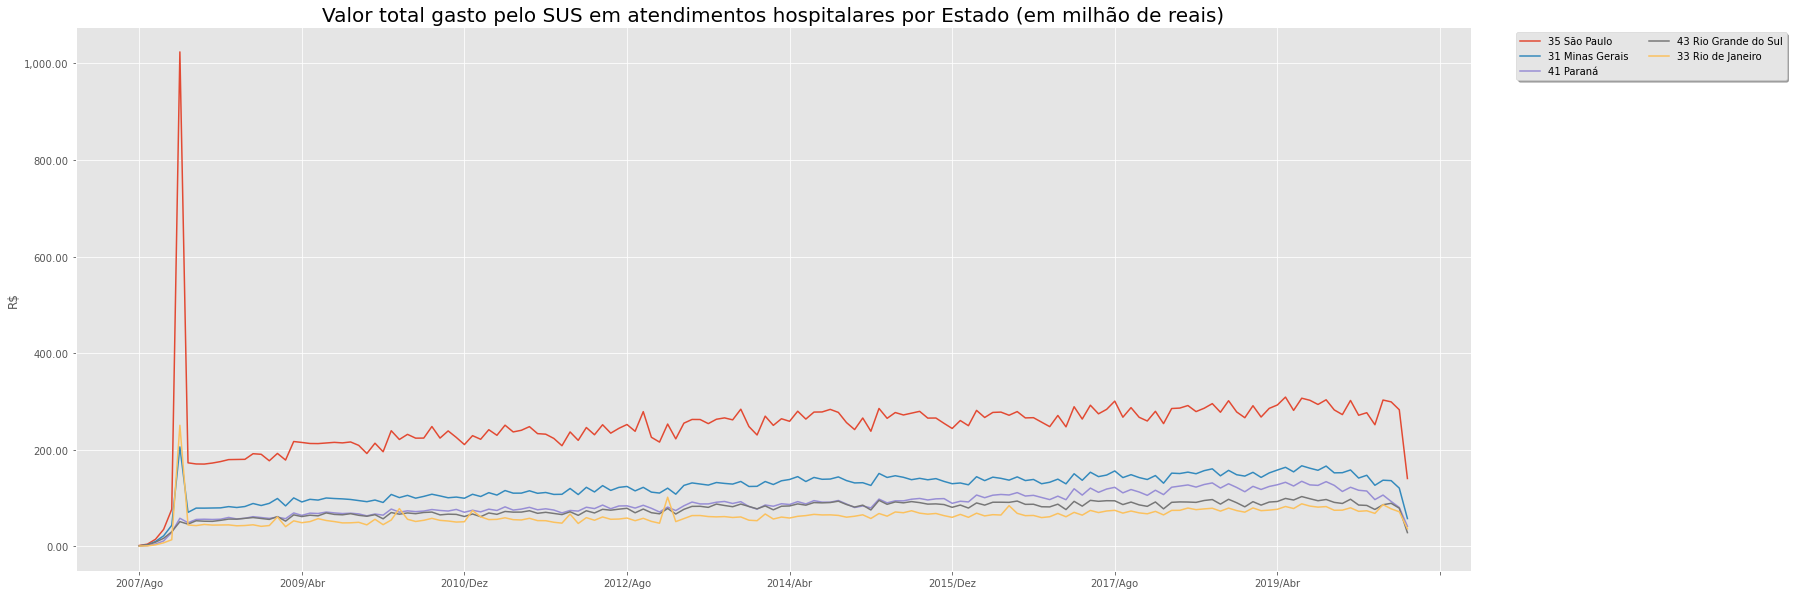

In [34]:
ax = usaveis_plot.head(5).T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

Podemos notar no gráfico um pico muito estranho (sobretudo para São Paulo) entre o final de 2007 e início de 2008. Isso pode estar relacionado a data de criação deste banco de dados, que pode ter recebido um importação gigantesca neste período.
Analisando o dataframe, vemos que este pico ocorreu em janeiro de 2008. Para não deixar este comportamento anômalo no gráfico, vamos remover do dataframe as seis primeiras colunas, de forma a trabalharmos com os dados a partir de fevereiro de 2008.

In [35]:
colunas_de_interesse = usaveis_plot.columns[6:]
usaveis_plot = usaveis_plot[colunas_de_interesse]
usaveis_plot

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,...,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71,140.41
31 Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,...,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47,57.47
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32,41.54
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93,28.35
33 Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,...,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54,36.26
29 Bahia,33.41,41.30,42.83,42.07,39.91,57.66,43.25,42.85,43.33,40.95,...,72.31,68.58,74.37,67.70,70.34,59.11,61.76,65.16,58.90,26.02
26 Pernambuco,26.22,30.72,30.59,31.41,28.95,30.99,31.71,30.70,31.17,30.89,...,68.40,64.86,69.63,62.55,59.63,53.84,65.42,68.15,62.33,33.54
42 Santa Catarina,24.41,27.48,27.81,28.35,28.99,30.05,28.89,30.73,31.27,30.00,...,62.64,58.21,64.55,59.55,56.71,51.18,56.84,56.50,51.76,16.99
23 Ceará,27.64,30.09,31.38,31.19,29.46,30.30,29.30,30.44,31.74,30.42,...,50.21,48.45,53.09,49.02,46.40,43.47,54.20,42.15,30.81,14.56


Basta plotar o gráfico novamente.

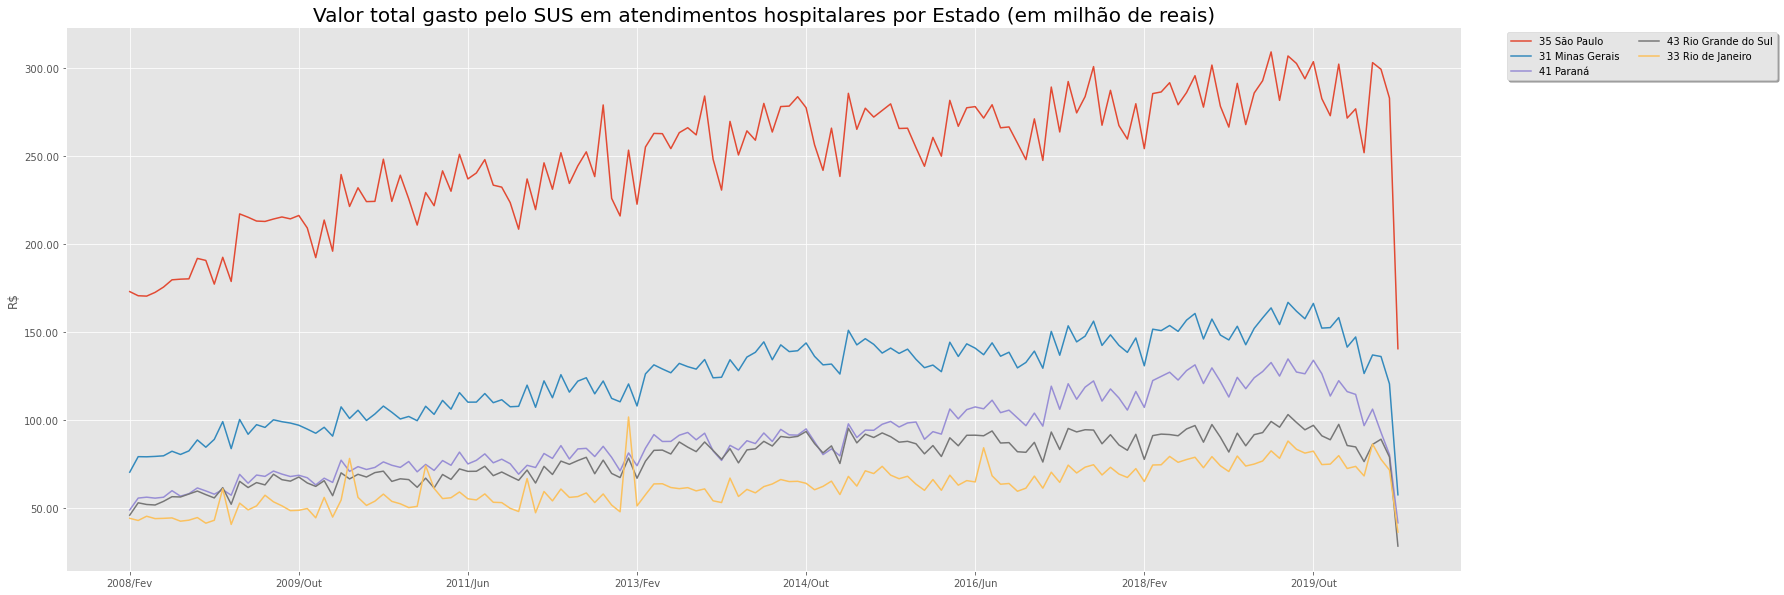

In [36]:
ax = usaveis_plot.head(5).T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

#### Desafio 3 - Adicionar coluna contendo a região de cada estado

In [37]:
usaveis_plot.index

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '29 Bahia', '26 Pernambuco', '42 Santa Catarina',
       '23 Ceará', '52 Goiás', '15 Pará', '21 Maranhão', '32 Espírito Santo',
       '24 Rio Grande do Norte', '25 Paraíba', '53 Distrito Federal',
       '50 Mato Grosso do Sul', '22 Piauí', '27 Alagoas', '51 Mato Grosso',
       '13 Amazonas', '28 Sergipe', '17 Tocantins', '11 Rondônia', '12 Acre',
       '14 Roraima', '16 Amapá'],
      dtype='object', name='Unidade da Federação')

E agora vamos criar uma função que irá preencher as regiões

In [38]:
def preenche_regioes(x):
    if x == "1":
        return "Norte"
    if x == "2":
        return "Nordeste"
    if x == "3":
        return "Sudeste"
    if x == "4":
        return "Sul"
    return "Centro-Oeste"

E agora é só adicionar a nova coluna, contendo as regiões

In [39]:
for index, row in usaveis_plot.iterrows():
    regiao = preenche_regioes(index[:1])
    usaveis_plot.loc[index, "Região"] = regiao
    

/Users/edwi/Anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edwi/Anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Agora basta conferir se as regiões foram inseridas.

In [40]:
usaveis_plot

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,...,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71,140.41,Sudeste
31 Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,...,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47,57.47,Sudeste
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32,41.54,Sul
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93,28.35,Sul
33 Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,...,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54,36.26,Sudeste
29 Bahia,33.41,41.30,42.83,42.07,39.91,57.66,43.25,42.85,43.33,40.95,...,68.58,74.37,67.70,70.34,59.11,61.76,65.16,58.90,26.02,Nordeste
26 Pernambuco,26.22,30.72,30.59,31.41,28.95,30.99,31.71,30.70,31.17,30.89,...,64.86,69.63,62.55,59.63,53.84,65.42,68.15,62.33,33.54,Nordeste
42 Santa Catarina,24.41,27.48,27.81,28.35,28.99,30.05,28.89,30.73,31.27,30.00,...,58.21,64.55,59.55,56.71,51.18,56.84,56.50,51.76,16.99,Sul
23 Ceará,27.64,30.09,31.38,31.19,29.46,30.30,29.30,30.44,31.74,30.42,...,48.45,53.09,49.02,46.40,43.47,54.20,42.15,30.81,14.56,Nordeste


#### Desafio 4 - Adicionar um sexto Estado aos cinco primeiros

Vamos plotar o gráfico dos cinco primeiros Estados que mais gastaram, mais Alagoas! Vamos criar um novo dataframe a partir dos cincos primeiros e adicionar o Estado de Alagoas.

In [41]:
usaveis_mais_alagoas = usaveis_plot.iloc[[0,1,2,3,4,18]].drop("Região", axis=1)
usaveis_mais_alagoas

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,...,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71,140.41
31 Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,...,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47,57.47
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,...,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32,41.54
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,...,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93,28.35
33 Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,...,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54,36.26
27 Alagoas,8.11,9.21,10.47,9.84,10.29,9.39,9.26,9.23,9.46,9.58,...,16.43,15.97,17.26,15.23,16.00,14.24,15.25,14.28,13.09,6.49


Abaixo segue o gráfico

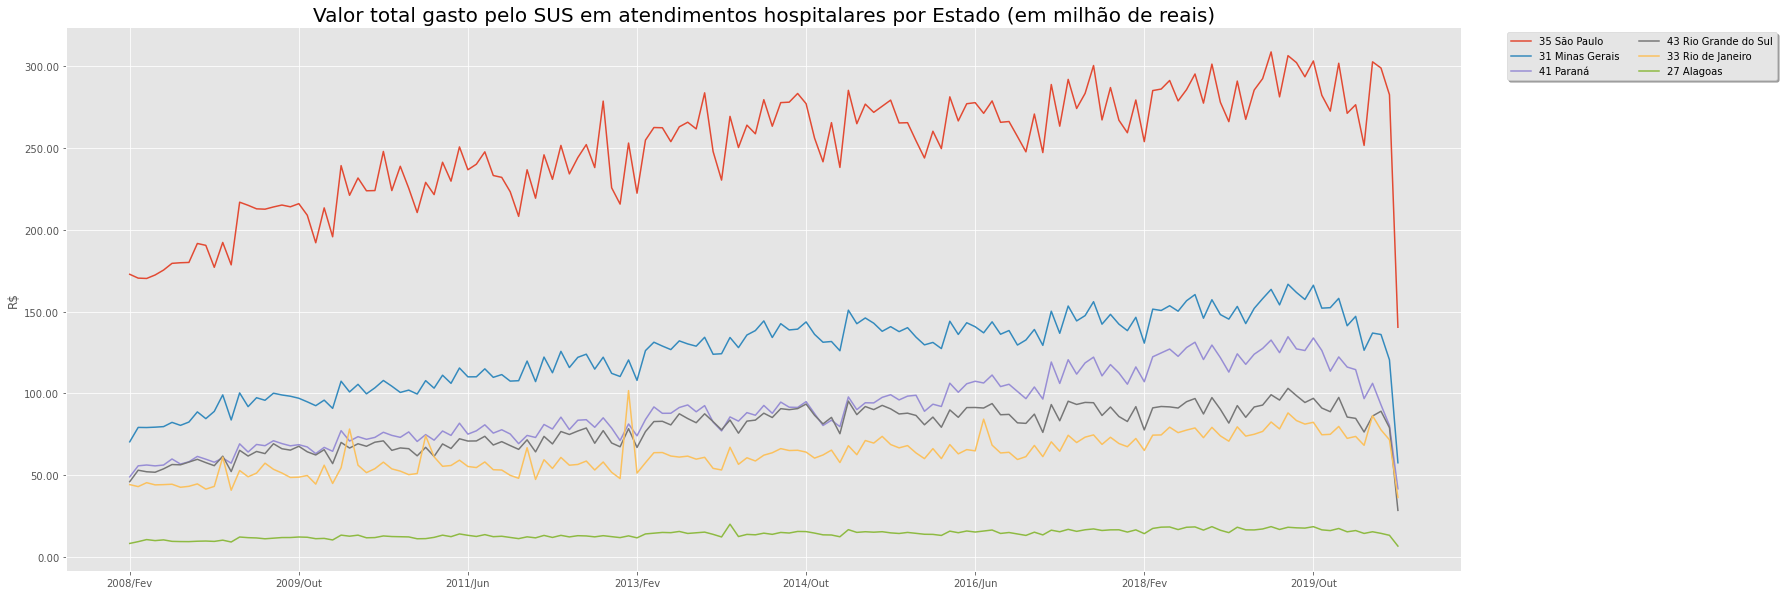

In [42]:
ax = usaveis_mais_alagoas.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

#### Desafio 5 - Pesquisar sobre crises sanitárias (dengue) e comparar com o gráfico

No gráfico acima, podemos ver que existem alguns picos no Rio de Janeiro, sobretudo um perto de "2013/Fev". Soube-se por meio da imprensa que o Estado do Rio de Janeiro enfrentou um surto de dengue no referido ano.
Para verificar se o surto coincide com os gastos hospitalares, recorri ao <a href="http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/denguebr.def">Tabnet Datasus</a> e pesquisei por notificações de casos prováveis de dengue por mês, filtrando por primeiros sintomas.

Inicialmente vamos importar os dados.

In [43]:
dados_dengue_RJ = pd.read_csv("A192938189_28_143_208.csv", encoding="ISO-8859-1", skiprows=4, sep=";", skipfooter=17, thousands=".", decimal=",", engine="python")
dados_dengue_RJ= dados_dengue_RJ.set_index("Mês 1º Sintoma(s)")
dados_dengue_RJ

,Casos_Prováveis
Mês 1º Sintoma(s),
Janeiro,16373
Fevereiro,34033
Marco,72286
Abril,58190
Maio,17934
Junho,4613
Julho,1471
Agosto,693
Setembro,518


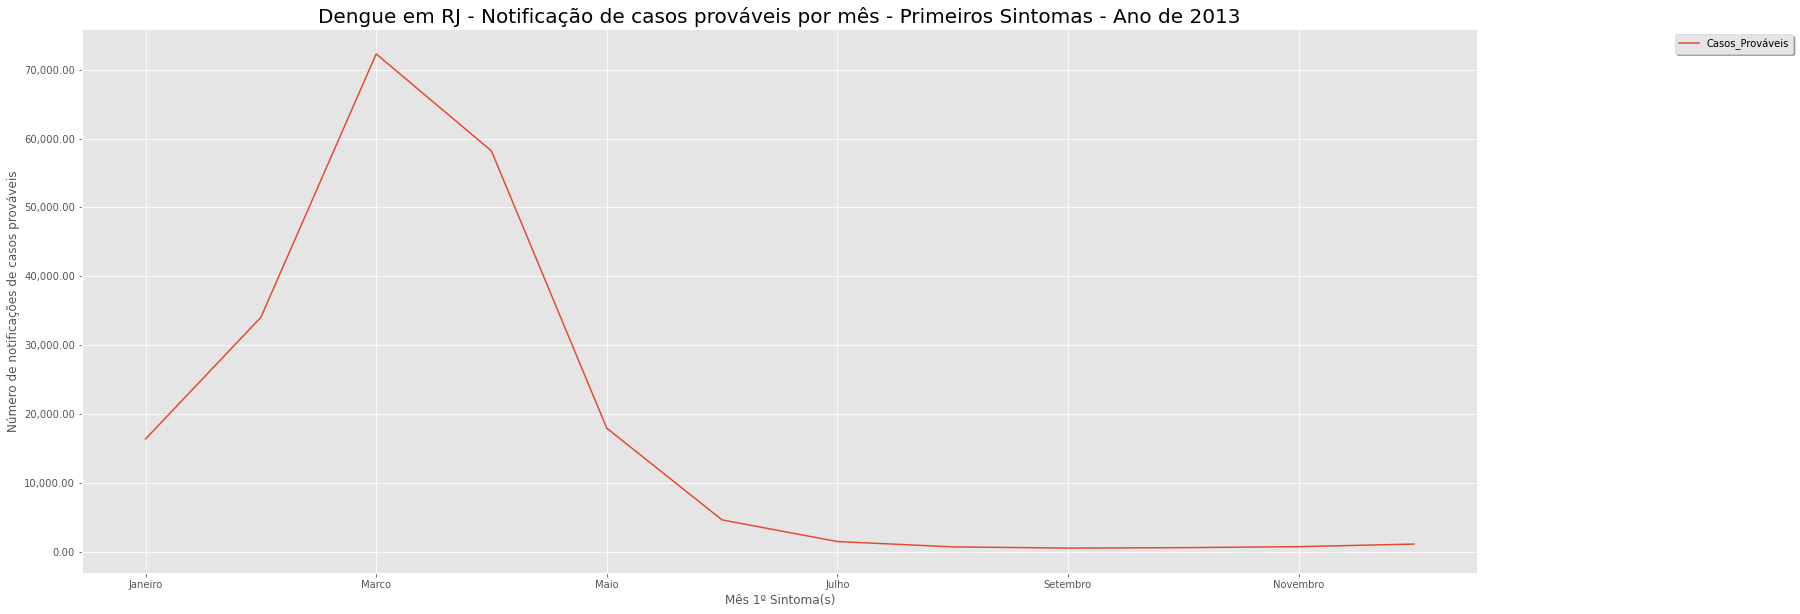

In [44]:
ax = dados_dengue_RJ.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("Número de notificações de casos prováveis")
plt.title(label = "Dengue em RJ - Notificação de casos prováveis por mês - Primeiros Sintomas - Ano de 2013", fontsize=20)
plt.show()

E agora vamos plotar os gastos hospitalares apenas do Rio de Janeiro para o mesmo ano de 2013.

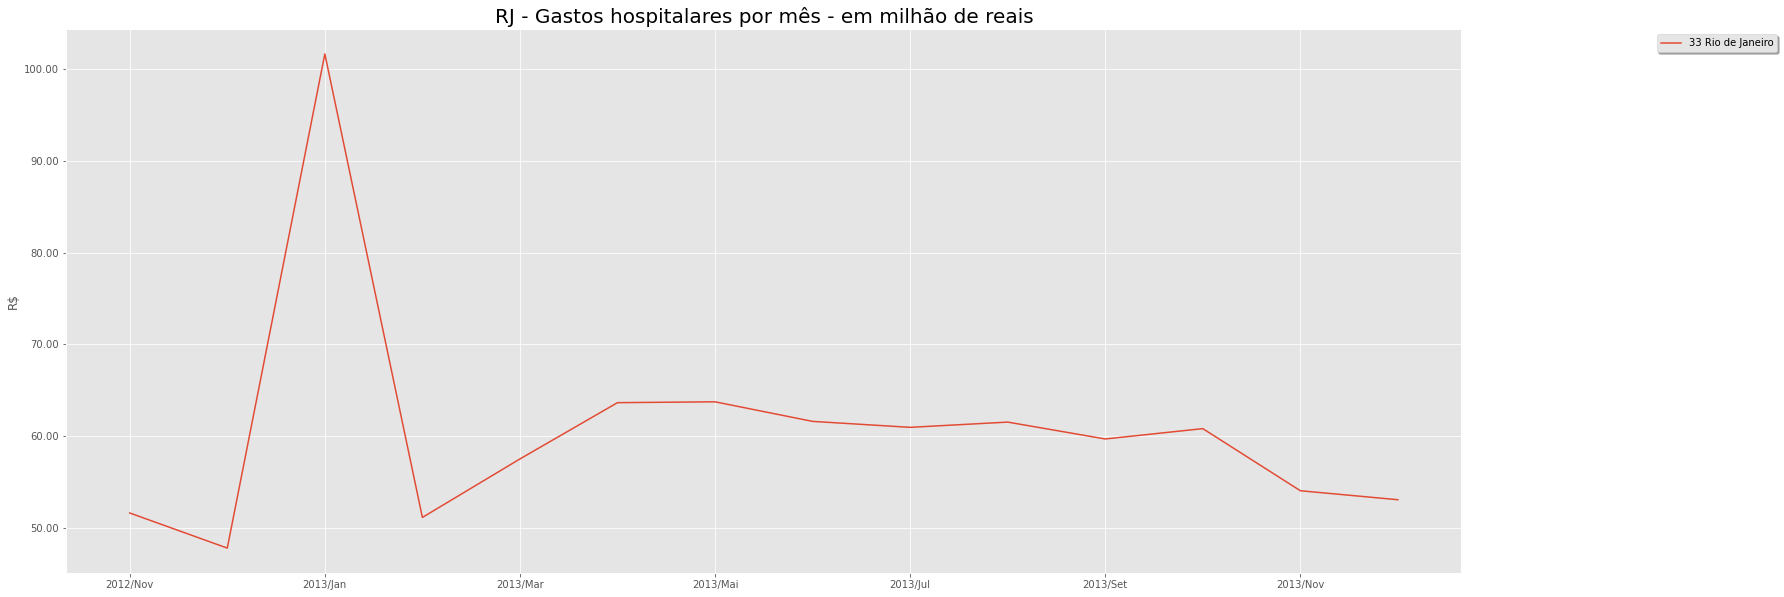

In [45]:
gastos_hospitalares_RJ = usaveis_plot.iloc[[4]].drop("Região", axis=1)
gastos_hospitalares_RJ = gastos_hospitalares_RJ[["2012/Nov","2012/Dez","2013/Jan","2013/Fev","2013/Mar","2013/Abr","2013/Mai","2013/Jun","2013/Jul","2013/Ago","2013/Set","2013/Out","2013/Nov","2013/Dez"]]
ax = gastos_hospitalares_RJ.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "RJ - Gastos hospitalares por mês - em milhão de reais", fontsize=20)
plt.show()

Como é possível verificar, os gastos hospitalares coincidem com os picos de notificações de casos de dengue no Estado para o mesmo período.

#### Desafio 6 - Plotar o gráfico somente com os Estados da região Sudeste e ver se ocorre o mesmo comportamento observado no Rio de Janeiro

Aqui vamos fazer a mesma avaliação que fizemos para o Estado do Rio de Janeiro. Mas desta vez considerando os quatro Estados da região Sudeste.
Acessei novamente o sistema <a href="http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/denguebr.def">Tabnet Datasus</a> e pesquisei por notificações de casos prováveis de dengue por mês, filtrando por primeiros sintomas. Mas desta vez incluí os outros três Estados do Sudeste do país.

In [46]:
dados_dengue_sudeste = pd.read_csv("A201704189_28_143_208.csv", encoding="ISO-8859-1", skiprows=4, sep=";", skipfooter=17, thousands=".", decimal=",", engine="python")
dados_dengue_sudeste = dados_dengue_sudeste.iloc[1:]
dados_dengue_sudeste = dados_dengue_sudeste.set_index("Mês 1º Sintoma(s)")
dados_dengue_sudeste["ES"] = pd.to_numeric(dados_dengue_sudeste["ES"])
dados_dengue_sudeste["SP"] = pd.to_numeric(dados_dengue_sudeste["SP"])
dados_dengue_sudeste["RJ"] = pd.to_numeric(dados_dengue_sudeste["RJ"])
dados_dengue_sudeste = dados_dengue_sudeste.drop("Total", axis=1)
dados_dengue_sudeste

,MG,ES,RJ,SP
Mês 1º Sintoma(s),,,,
Janeiro,35474,6759,16373,12947
Fevereiro,62419,10391,34033,30168
Marco,147272,16755,72286,72678
Abril,124495,13747,58190,65750
Maio,31371,8742,17934,25064
Junho,7222,3937,4613,5547
Julho,1627,2014,1471,1316
Agosto,658,1170,693,571
Setembro,615,839,518,440


Vamos plotar o gráfico destes dados!

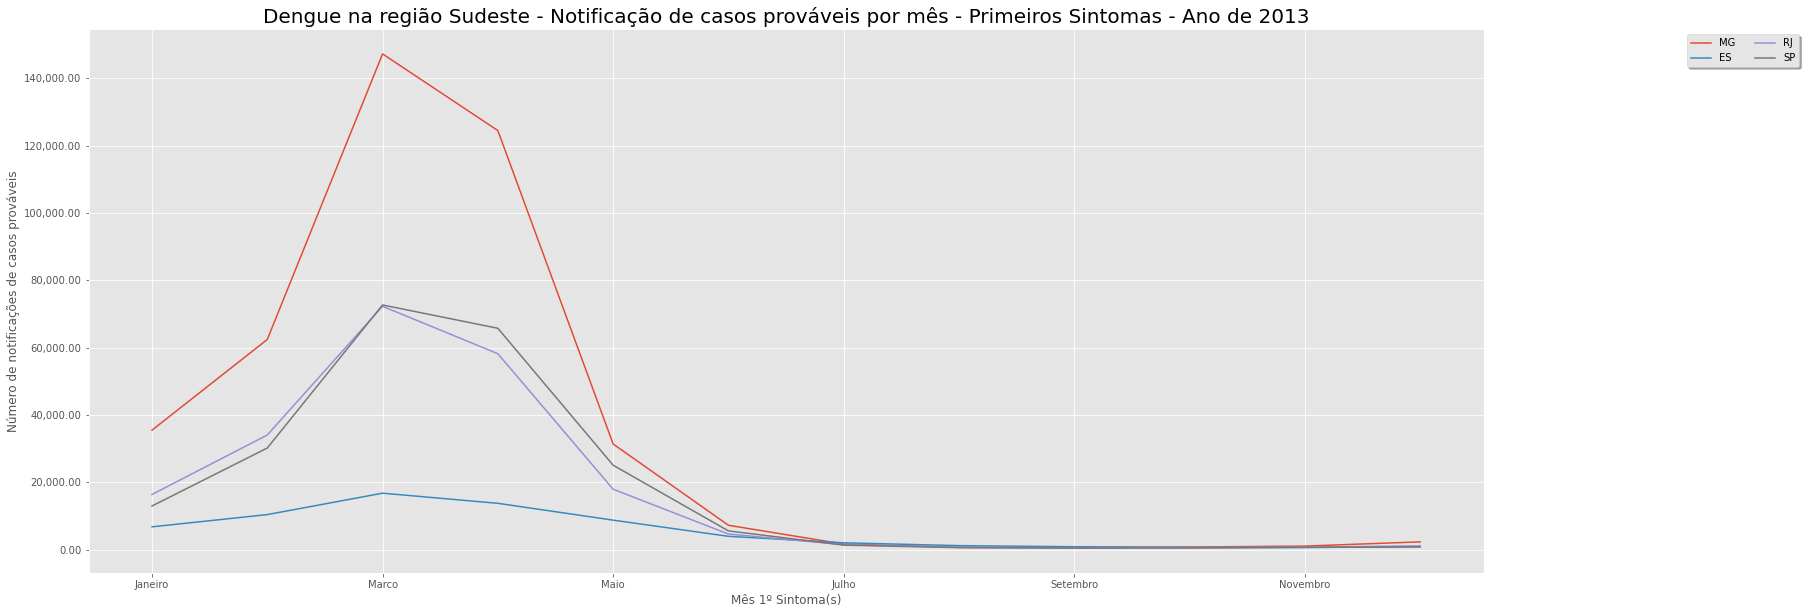

In [47]:
ax = dados_dengue_sudeste.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("Número de notificações de casos prováveis")
plt.title(label = "Dengue na região Sudeste - Notificação de casos prováveis por mês - Primeiros Sintomas - Ano de 2013", fontsize=20)
plt.show()

Agora vamos plotar o gráfico de gastos hospitalares apenas da região sudeste para o mesmo período. Como adicionamos uma coluna contendo a região dos Estados em uma atividade anterior, iremos aproveitar a mesma agora.

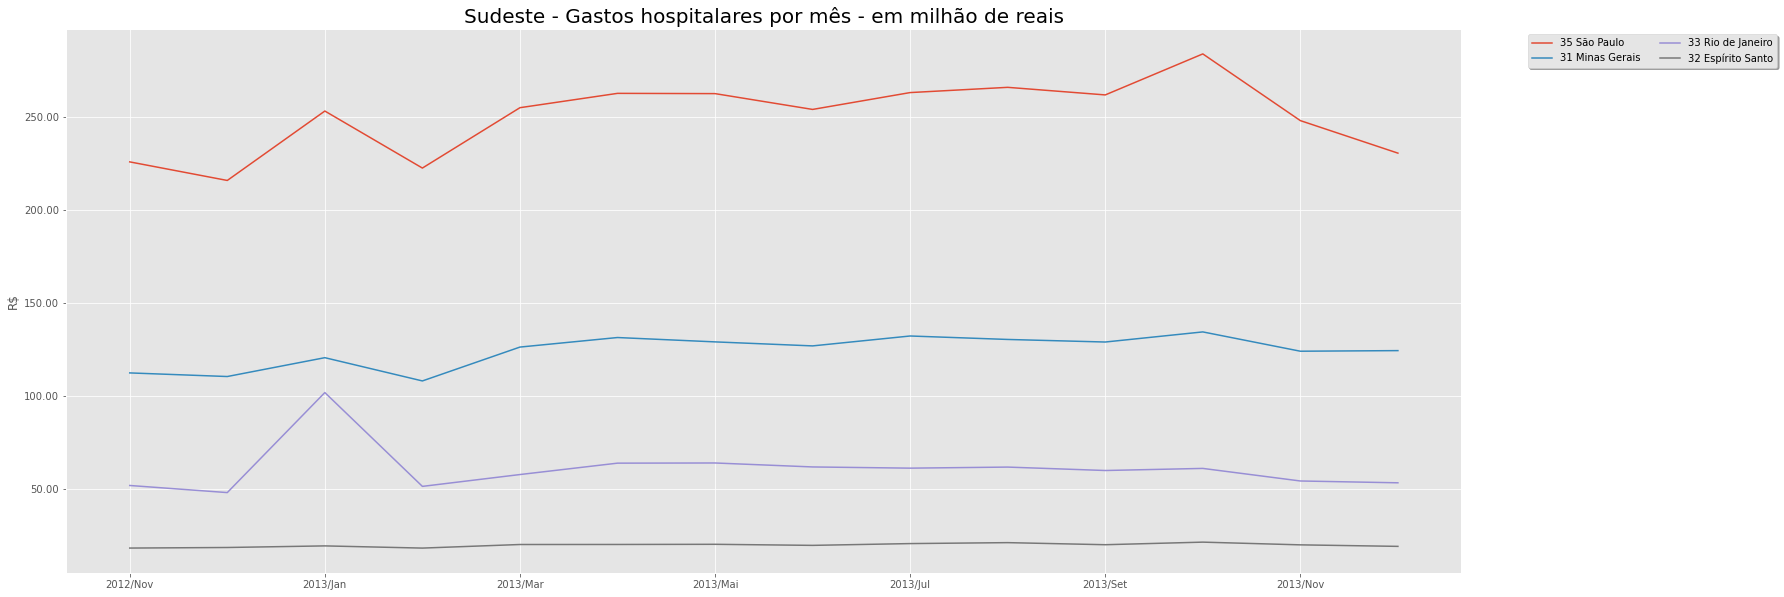

In [48]:
gastos_hospitalares_sudeste = usaveis_plot[usaveis_plot["Região"] == "Sudeste"]
gastos_hospitalares_sudeste = gastos_hospitalares_sudeste.drop("Região", axis=1)
gastos_hospitalares_sudeste = gastos_hospitalares_sudeste[["2012/Nov","2012/Dez","2013/Jan","2013/Fev","2013/Mar","2013/Abr","2013/Mai","2013/Jun","2013/Jul","2013/Ago","2013/Set","2013/Out","2013/Nov","2013/Dez"]]
ax = gastos_hospitalares_sudeste.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Sudeste - Gastos hospitalares por mês - em milhão de reais", fontsize=20)
plt.show()

Pelos gráficos, observamos que os gastos hospitalares da região sudeste subiram praticamente na mesma proporção do aumento de casos de dengue para o mesmo período.

#### Conclusões

 - Os gráficos mostram uma tendência crescente de gastos hospitalares em toda a região Sudeste
 - Os picos de gastos ocorrem mais durante o verão. Creio que seja pela época do ano onde mais se dissemina doenças tropicais
 - O Estado de São Paulo tem gastos hospitalares maiores que os outros três Estados da região Sudeste somados! o_O
 - A região Sul do país também puxa a alta de gastos hospitalares com os Estados do Paraná e Rio Grande do Sul.

### Aula 5 - Manipulação e interpretação de gráficos

Neste ponto da aula, vamos reproduzir o mesmo gráfico de barras que fizemos na aula 1, porém com o dataframe atualizado e considerando o mês mais recente disponível, que é agosto de 2020.

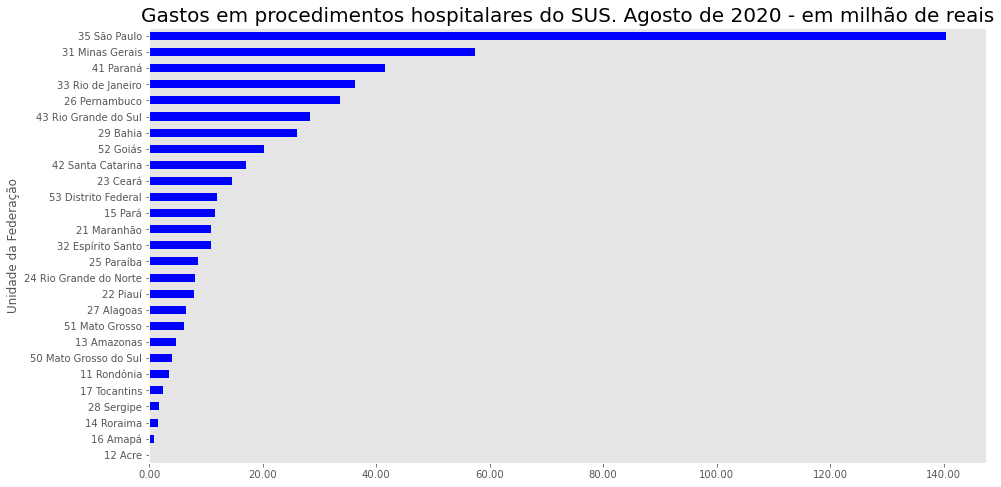

In [49]:
gastos_mes_mais_recente = usaveis_plot.drop("Região", axis=1)
mes_mais_recente = gastos_mes_mais_recente.columns[-1]
gastos_mes_mais_recente = gastos_mes_mais_recente.sort_values(by=mes_mais_recente, ascending=False)
gastos_mes_mais_recente = gastos_mes_mais_recente[mes_mais_recente]
ax = gastos_mes_mais_recente.plot(x="Unidade da Federação", y="2020/Ago", kind="barh", color="blue", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label="Gastos em procedimentos hospitalares do SUS. Agosto de 2020 - em milhão de reais", fontsize=20)
plt.grid(False)
plt.show()

#### Desafio 1 - Colocar grid no gráfico e adicionar no gráfico de barra

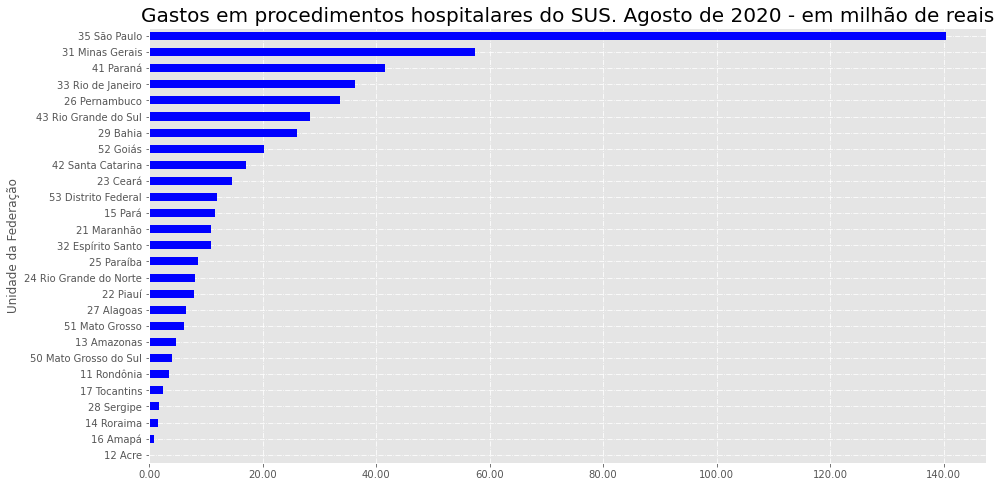

In [50]:
ax = gastos_mes_mais_recente.plot(x="Unidade da Federação", y="2020/Ago", kind="barh", color="blue", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label="Gastos em procedimentos hospitalares do SUS. Agosto de 2020 - em milhão de reais", fontsize=20)
plt.grid(True, linestyle="-.")
plt.show()

#### Desafio 2 - Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu Estado, ou qualquer outro de interesse

Primeiramente vamos fazer em função do meu Estado, que é São Paulo

In [51]:
gastos_recentes_por_sao_paulo = gastos_mes_mais_recente / gastos_mes_mais_recente["35 São Paulo"]
gastos_recentes_por_sao_paulo

Unidade da Federação
35 São Paulo             1.00
31 Minas Gerais          0.41
41 Paraná                0.30
33 Rio de Janeiro        0.26
26 Pernambuco            0.24
43 Rio Grande do Sul     0.20
29 Bahia                 0.19
52 Goiás                 0.14
42 Santa Catarina        0.12
23 Ceará                 0.10
53 Distrito Federal      0.09
15 Pará                  0.08
21 Maranhão              0.08
32 Espírito Santo        0.08
25 Paraíba               0.06
24 Rio Grande do Norte   0.06
22 Piauí                 0.06
27 Alagoas               0.05
51 Mato Grosso           0.04
13 Amazonas              0.03
50 Mato Grosso do Sul    0.03
11 Rondônia              0.03
17 Tocantins             0.02
28 Sergipe               0.01
14 Roraima               0.01
16 Amapá                 0.01
12 Acre                  0.00
Name: 2020/Ago, dtype: float64

E agora plotaremos o gráfico.

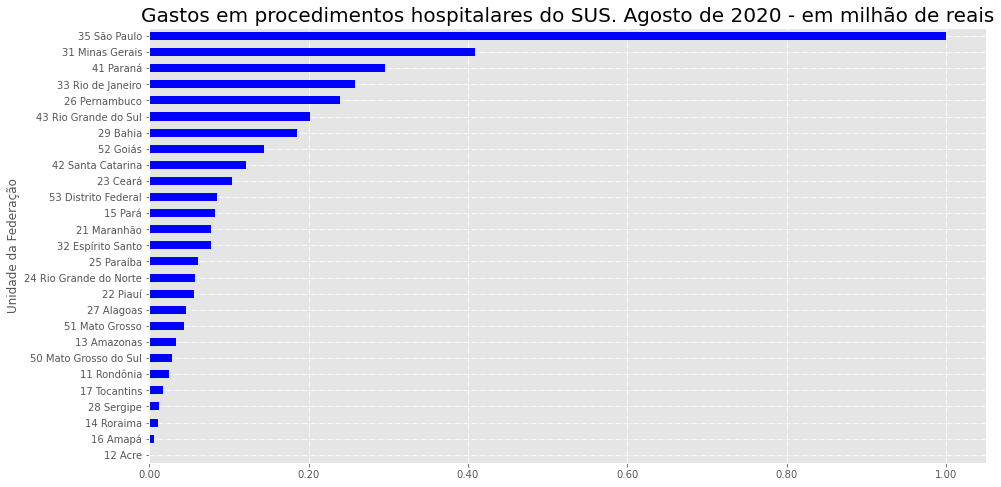

In [52]:
ax = gastos_recentes_por_sao_paulo.plot(x="Unidade da Federação", y="2020/Ago", kind="barh", color="blue", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label="Gastos em procedimentos hospitalares do SUS. Agosto de 2020 - em milhão de reais", fontsize=20)
plt.grid(True, linestyle="-.")
plt.show()

Como São Paulo foi o Estado que mais gastou, farei a mesma comparação, mas em função do Estado do meu pai (Alagoas)

In [53]:
gastos_recentes_por_alagoas = gastos_mes_mais_recente / gastos_mes_mais_recente["27 Alagoas"]
gastos_recentes_por_alagoas

Unidade da Federação
35 São Paulo             21.64
31 Minas Gerais           8.86
41 Paraná                 6.40
33 Rio de Janeiro         5.59
26 Pernambuco             5.17
43 Rio Grande do Sul      4.37
29 Bahia                  4.01
52 Goiás                  3.12
42 Santa Catarina         2.62
23 Ceará                  2.24
53 Distrito Federal       1.86
15 Pará                   1.78
21 Maranhão               1.68
32 Espírito Santo         1.67
25 Paraíba                1.32
24 Rio Grande do Norte    1.25
22 Piauí                  1.22
27 Alagoas                1.00
51 Mato Grosso            0.95
13 Amazonas               0.73
50 Mato Grosso do Sul     0.63
11 Rondônia               0.55
17 Tocantins              0.38
28 Sergipe                0.27
14 Roraima                0.23
16 Amapá                  0.13
12 Acre                   0.00
Name: 2020/Ago, dtype: float64

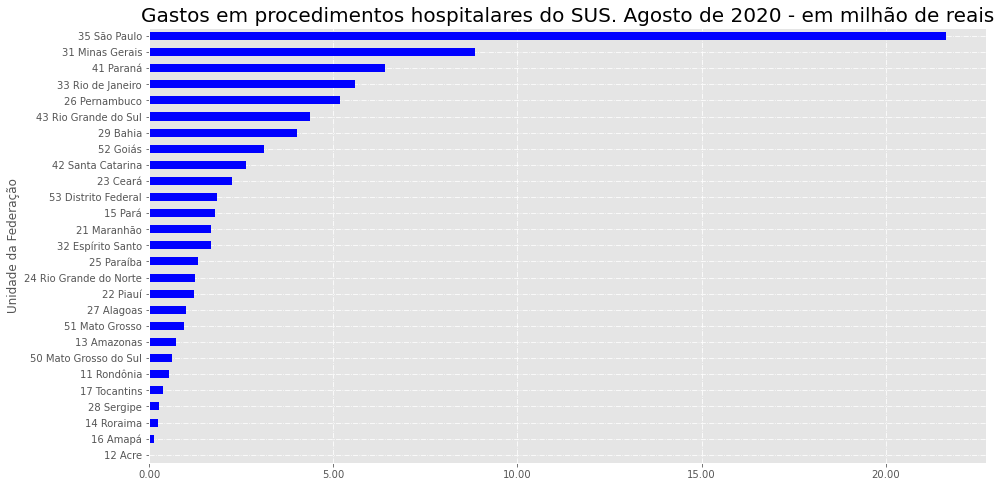

In [54]:
ax = gastos_recentes_por_alagoas.plot(x="Unidade da Federação", y="2020/Ago", kind="barh", color="blue", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label="Gastos em procedimentos hospitalares do SUS. Agosto de 2020 - em milhão de reais", fontsize=20)
plt.grid(True, linestyle="-.")
plt.show()

#### Desafio 3 - Fazer o cálculo proporcional a população do seu Estado e mais um a sua escolha

Existe na Wikipedia uma tabela chamada "Lista de unidades federativas do Brasil por população". Vamos usa-la para obter a população de cada Estado.

In [55]:
wikipedia_url_populacao_por_estado = "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"
populacao = pd.read_html(wikipedia_url_populacao_por_estado, header=0)[0]
populacao

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


Da lista acima, apenas as colunas "Unidade Federativa" e "População" servem para este desafio. Então vamos recuperas

In [56]:
populacao = populacao[["Unidade federativa", "População"]]
populacao

,Unidade federativa,População
0,São Paulo,46 289 333
1,Minas Gerais,21 292 666
2,Rio de Janeiro,17 366 189
3,Bahia,14 930 634
4,Paraná,11 516 840
5,Rio Grande do Sul,11 422 973
6,Pernambuco,9 616 621
7,Ceará,9 187 103
8,Pará,8 690 745
9,Santa Catarina,7 252 502


Agora podemos adicionar a coluna com a população no nosso dataset. Primeiro, vamos converter a coluna "População" para um tipo numérico.

In [57]:
populacao["População"] = populacao["População"].str.replace(" ","").astype("int")
populacao = populacao.set_index("Unidade federativa")
populacao

<ipython-input-57-27dfdd0be430>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populacao["População"] = populacao["População"].str.replace(" ","").astype("int")


,População
Unidade federativa,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


E agora vamos adicionar a população ao dataset.

In [58]:
gastos_proporcional_populacao = usaveis_plot.drop("Região", axis=1)
gastos_proporcional_populacao = gastos_proporcional_populacao.multiply(1000000)
gastos_proporcional_populacao["Total"] = gastos_proporcional_populacao.sum(axis=1)
gastos_proporcional_populacao = gastos_proporcional_populacao.sort_values("Total", ascending=False)

def get_populacao(estado):
    return populacao.loc[estado, "População"]


for index, row in gastos_proporcional_populacao.iterrows():
    numero_habitantes = get_populacao(index[3:])
    gastos_proporcional_populacao.loc[index, "População"] = numero_habitantes
    
gastos_proporcional_populacao["Gasto médio / Habitante"] = gastos_proporcional_populacao["Total"] / gastos_proporcional_populacao["População"]
gastos_proporcional_populacao

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,População,Gasto médio / Habitante
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,...,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95,37763536327.09,46289333.00,815.82
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,...,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06,18874650700.96,21292666.00,886.44
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,...,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16,13682182387.98,11516840.00,1188.02
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,...,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,11847935575.25,11422973.00,1037.20
33 Rio de Janeiro,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,...,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,36264322.65,9420373937.95,17366189.00,542.45
29 Bahia,33410124.06,41301703.40,42826993.62,42071294.17,39910042.40,57664560.93,43254543.33,42851268.02,43332573.68,40946908.97,...,67697544.36,70340301.29,59109689.20,61756775.71,65159300.63,58898100.40,26023558.53,9103157654.26,14930634.00,609.70
26 Pernambuco,26222079.10,30716361.81,30589332.79,31409553.23,28947510.92,30985515.77,31705296.79,30703879.20,31165074.59,30889234.12,...,62552189.96,59628674.07,53843729.23,65424719.40,68145110.59,62325444.34,33544876.14,7967379473.35,9616621.00,828.50
42 Santa Catarina,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,...,59549208.75,56709962.09,51179993.45,56843604.33,56503747.99,51764534.76,16991236.43,7243226283.80,7252502.00,998.72
23 Ceará,27643304.86,30085370.22,31376221.00,31189904.62,29463965.11,30302691.99,29304821.51,30435026.82,31741382.87,30415959.60,...,49015303.22,46395356.97,43468816.62,54200339.48,42146555.81,30809221.22,14559529.59,6146176419.30,9187103.00,669.00


Com os dados em mãos, podemos plotar o gráfico.

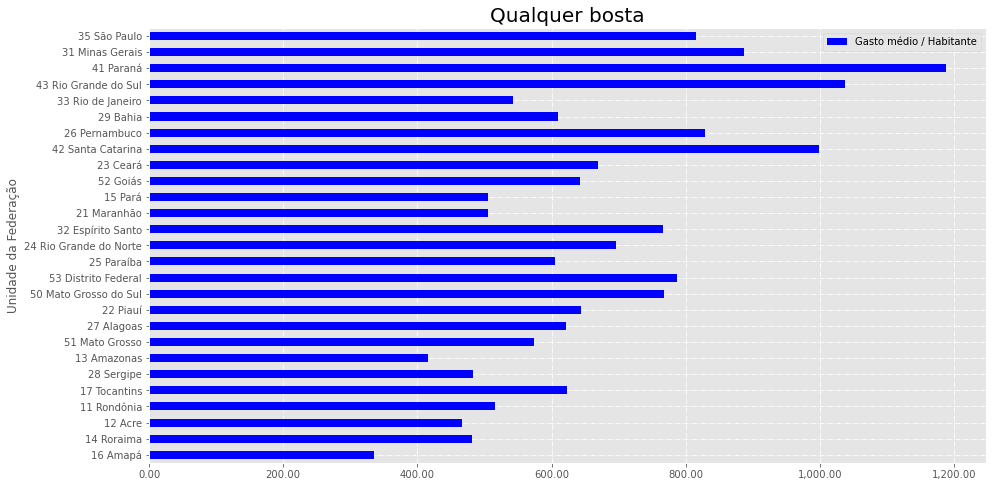

In [67]:
ax = gastos_proporcional_populacao.plot(y="Gasto médio / Habitante", kind="barh", color="blue", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label="Qualquer bosta", fontsize=20)
plt.grid(True, linestyle="-.")
plt.show()